In [1]:
# этот скрипт получает данные из cryptocompare и анализирует их. ислользовался преимущественно для поиска
# больших всплесков объемов(закупов)
# первая версия подобного кода в файле fast_analyze

In [ ]:
import requests
import urllib
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import numpy as np
from bittrex import Bittrex
bittrex = Bittrex(None, None)
market_names = []

sumary = bittrex.get_market_summaries()

for i in sumary.get('result'):
    market_names.append(i.get('MarketName')) # получить названия монет для обращения к cryptocompare

In [3]:
names = []
for i in market_names:
    if i[0:3] == 'BTC':
        names.append(i[4:]) # получить "чистые" названия монет
        

del names[16] # что-то с этими именами было не так, вроде разница bcc и bch 
del names[36] #

In [52]:
urls = []
for i in names:
    u = 'https://min-api.cryptocompare.com/data/histohour?fsym='+i+'&tsym=BTC&limit=85&e=BitTrex'
    urls.append(u)

In [49]:
urls1 = []
for i in names:
    u = 'https://min-api.cryptocompare.com/data/pricehistorical?fsym='+i+'&tsyms=BTC&ts=1508803200&e=BitTrex'
    urls1.append(u)

In [50]:
urls2 = []
for i in names:
    u = 'https://min-api.cryptocompare.com/data/pricehistorical?fsym='+i+'&tsyms=BTC&ts=1508810400&e=BitTrex'
    urls2.append(u)

In [61]:
r = requests.get(urls[0])
#print (r.json())
d = pd.DataFrame(r.json()['Data'])
print (d['time'] == 1508806800)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
Name: time, dtype: bool


In [62]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0'
}

for u in urls:
    r = requests.get(u, headers=headers)
    
    d = pd.DataFrame(r.json()['Data'])
    
    v1 = d.loc[18]['close']
    v2 = d.loc[19]['close']
    
    if v2 / v1 <= 1.02:
        print (u)

https://min-api.cryptocompare.com/data/histohour?fsym=ANT&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=BSD&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=BTS&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=CLOAK&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=ERC&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=FAIR&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=GLD&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=GRS&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=INFX&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=ION&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?fsym=NEOS&tsym=BTC&limit=85&e=BitTrex
https://min-api.cryptocompare.com/data/histohour?

In [34]:
i = 0
r2 = requests.get(urls2[i], headers=headers)
d2 = pd.DataFrame(r2.json())
v2 = d2[names[i]]['BTC']
print (v2)

KeyError: '1ST'

In [40]:
for i in names:
    if i == 'CRB':
        print (names.index(i))

36


In [73]:
u = 'https://min-api.cryptocompare.com/data/histominute?fsym=BRK&tsym=BTC&limit=3&aggregate=3&e=CCCAGG'

In [17]:
#u = 'https://min-api.cryptocompare.com/data/histominute?fsym=CLAM&tsym=BTC&limit=700&e=Coinbase'
#u = 'https://min-api.cryptocompare.com/data/histominute?fsym=GEO&tsym=BTC&limit=150&e=BitTrex'

# в этом случае я вычислял разницу средних значений за какой-то период 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0'
}

for u in urls:
    
    r = requests.get(u, headers=headers)

    dff = pd.DataFrame(r.json()['Data'])

    df = dff
    #print (df[270:320])
    #print (df[73:85])
    
    diff = df['close'][-15:].mean() / df['close'][:15].mean()
    #diff_vol = df['volumeto'][-15:].mean() / df['volumeto'][:15].mean()
    if diff >= 1.13:
        print (names[urls.index(u)])
        print ('vol', df['volumeto'].mean(), df['volumeto'].max())
        print ('price', df['close'][:10].mean(), df['close'][-10:].mean(), diff)
    
        

    #zval = stats.zscore(df['volumeto'])   а здесь вычистял z-value для поиска выбросов


    #print (df.loc[:10]['time'])
    #print (stats.zscore(df['volumeto']))
    #plt.ylabel(names[urls.index(u)])
    #plt.plot(df['close'])
    #plt.show()
    #plt.plot(df['volumeto'])
    #plt.show()
    #plt.plot(zval)
    #plt.show()
    
    
    ###############################################  в конце ноутбука будет ещё важный код. всё что до него - 
    ###############################################  подготовка данных и отладка

ADA
vol 3.478350783477683 51.56
price 4.968e-06 5.718999999999999e-06 1.1650328991540215
ARDR
vol 0.11967652231179207 20.39
price 3.8302e-05 4.5209999999999996e-05 1.1832771597715805
DAR
vol 0.11350732876748831 4.27
price 1.52e-05 2.7200000000000004e-05 1.787719298245615
GEO
vol 0.1601389444037309 11.96
price 0.00015290000000000003 0.00018494999999999997 1.2228471768040108
GRC
vol 0.042656657015323146 2.81
price 5.166e-06 6.434999999999999e-06 1.2487388436166085
GRS
vol 0.008576790333111255 0.8341
price 1.6459999999999998e-05 1.9041999999999998e-05 1.1556095585257193
IOP
vol 0.5170891270419716 17.95
price 0.00049865 0.00065928 1.3355304583149126
MEME
vol 0.060122939793471046 5.18
price 2.8289e-05 3.376000000000001e-05 1.1903415067436478
MUE
vol 0.022581431712191867 2.33
price 2.0208e-05 2.3245000000000005e-05 1.1631753757111383
PART
vol 0.0139102219853431 2.24
price 0.0009386 0.0010900000000000003 1.1728417201678567
PDC
vol 0.06597117405063294 6.25
price 2.032e-05 3.067e-05 1.524015748

ZeroDivisionError: float division by zero

In [74]:
r = requests.get(u)

In [9]:
import pandas as pd

0.3909309119205299 3.7440796


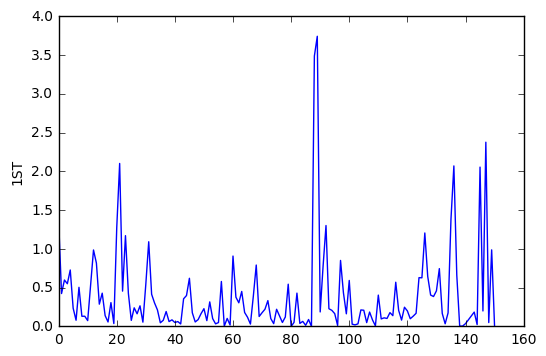

0.03569664900662251 0.74689


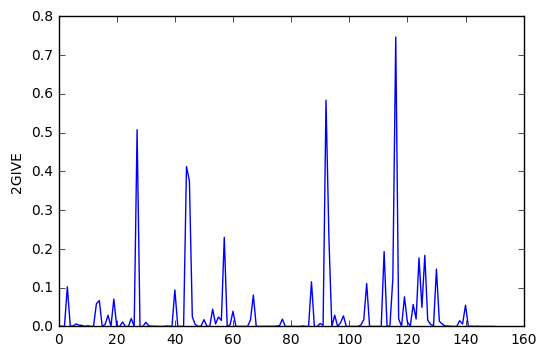

0.09385413609271524 1.87306


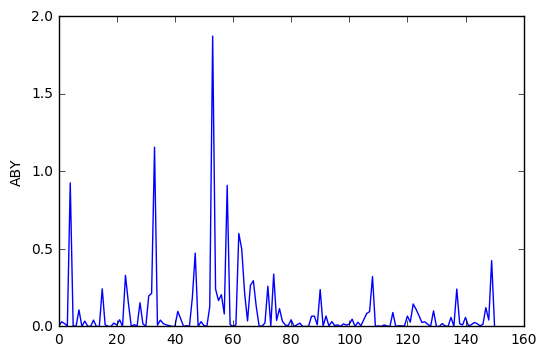

0.12797882052980133 2.8591


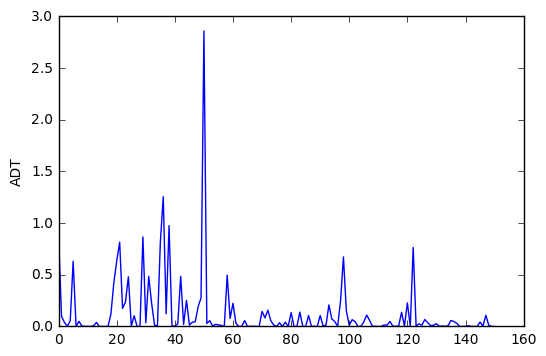

0.825434095960265 8.21


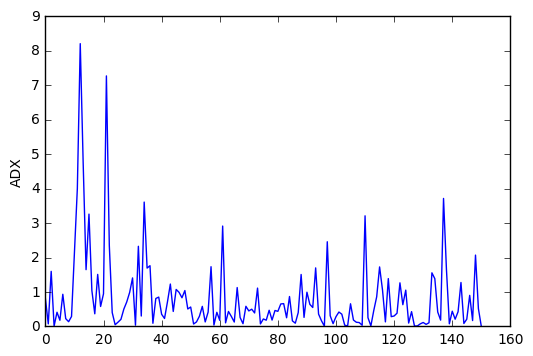

0.010505172450331125 0.4745


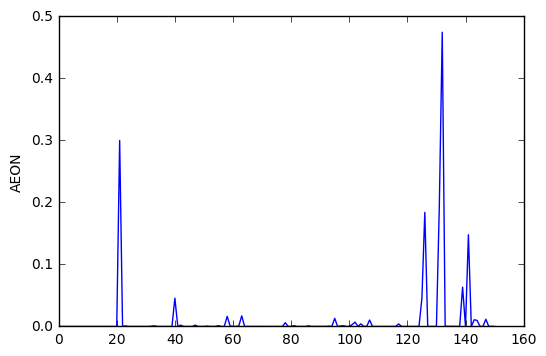

0.02553962185430464 1.37


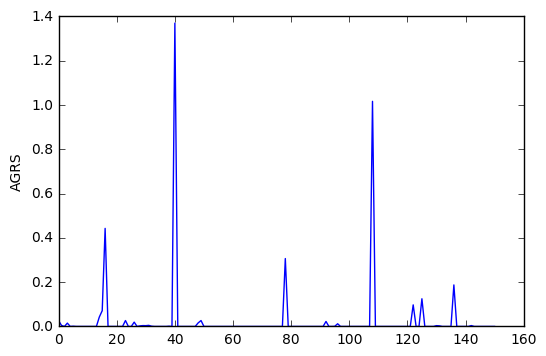

0.7096561109271523 11.2501094


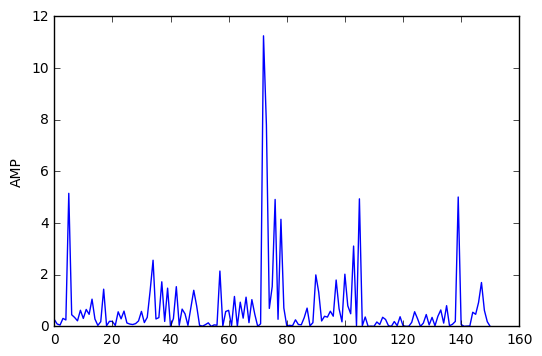

0.569226342384106 11.8157


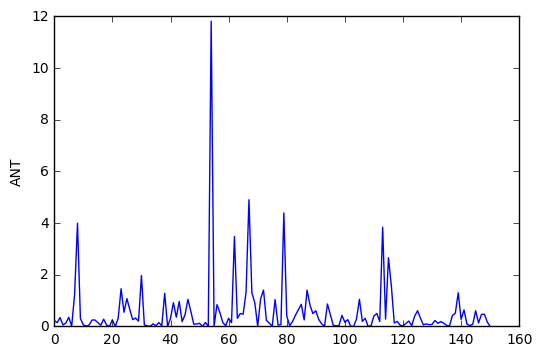

0.07276267748344373 3.59


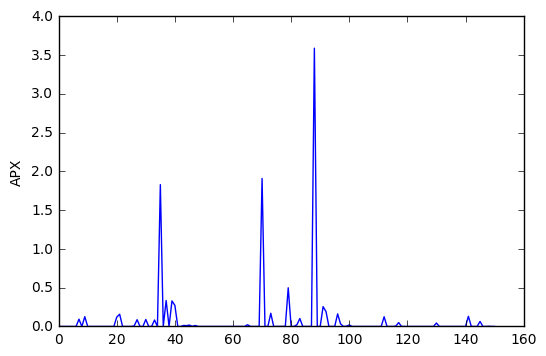

0.9292481489403972 12.4201123


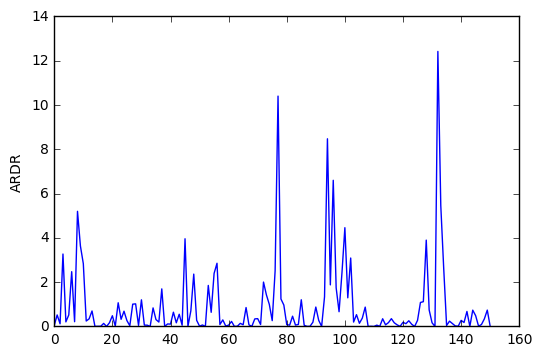

0.22004019271523176 2.57419


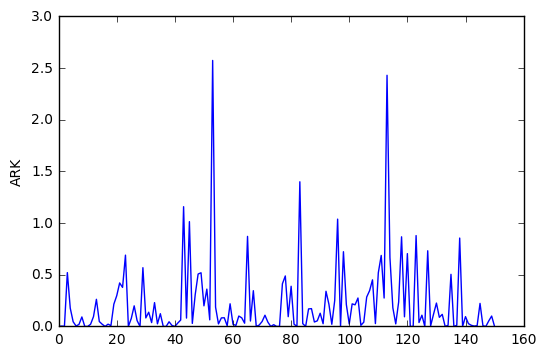

0.0073893434437086085 0.3331


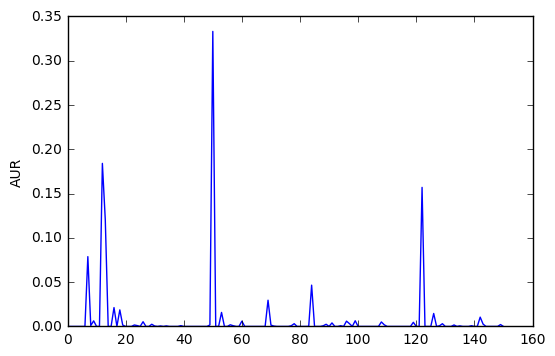

0.9965815593377485 8.6727


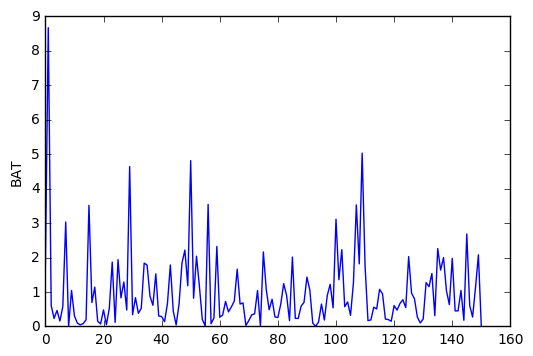

0.035189039735099355 0.82315


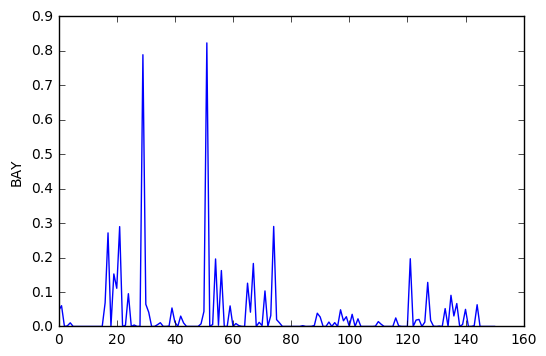

0.028769026490066216 0.8047


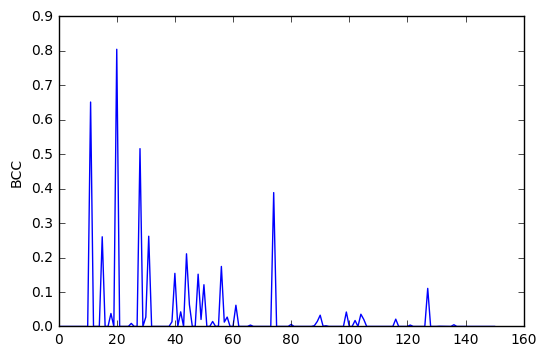

0.1291782403973509 2.3578


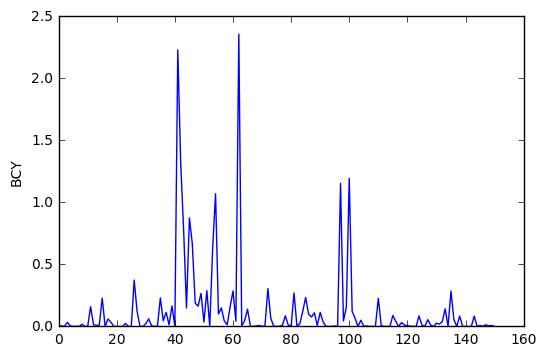

0.05109908086092716 0.90624


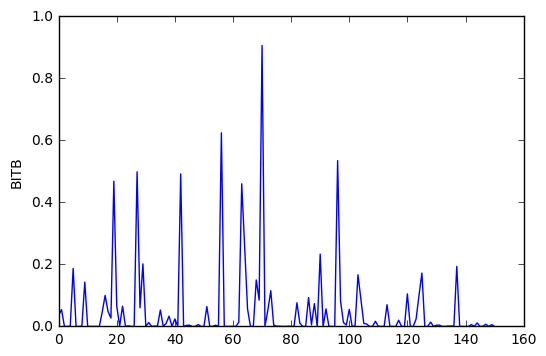

0.010458064503311259 0.335685


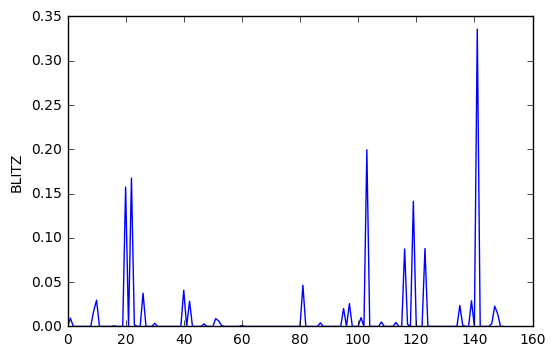

0.1087156761589404 2.65972


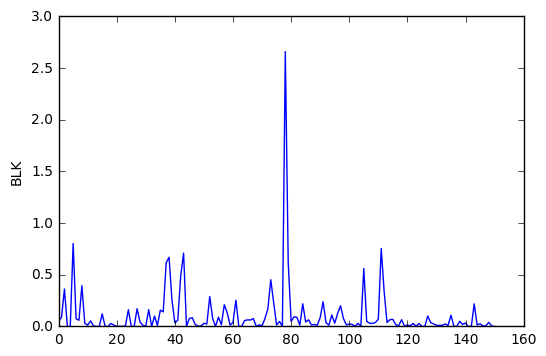

0.4124712509933774 11.7691


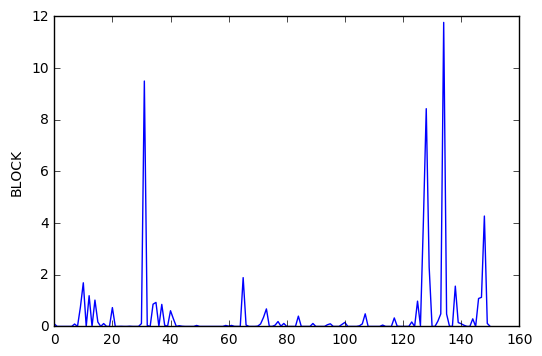

1.1784250013245028 5.181


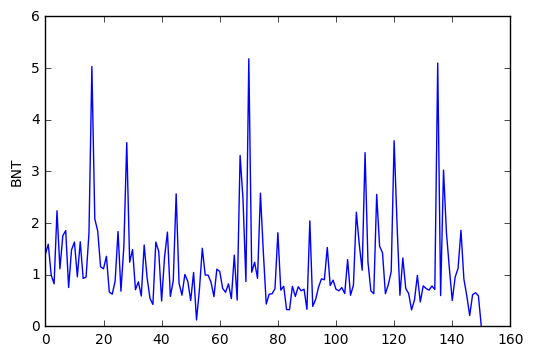

0.05035487026490066 3.69886


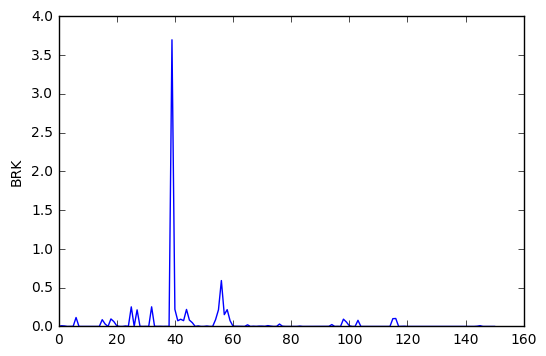

0.002478760264900662 0.12501


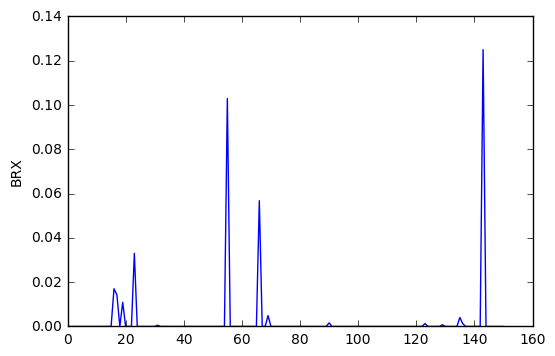

0.014404207947019868 0.72608


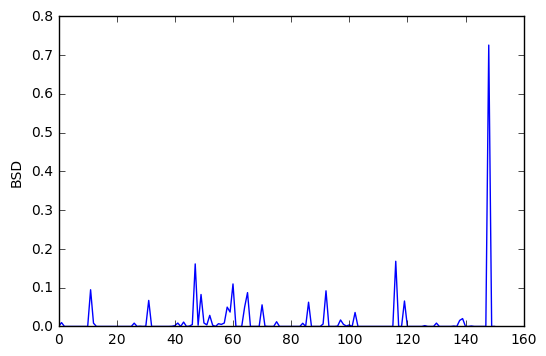

0.035040616754966884 2.46938


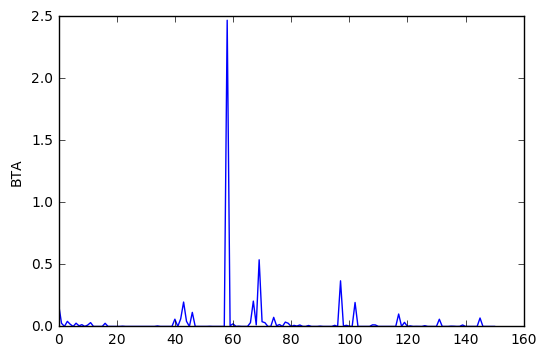

0.15409894324503307 3.0893


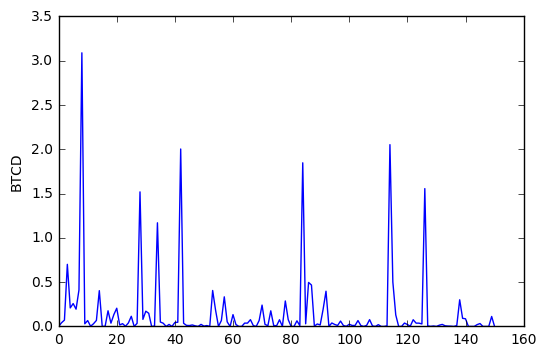

3.469242443708609 46.08


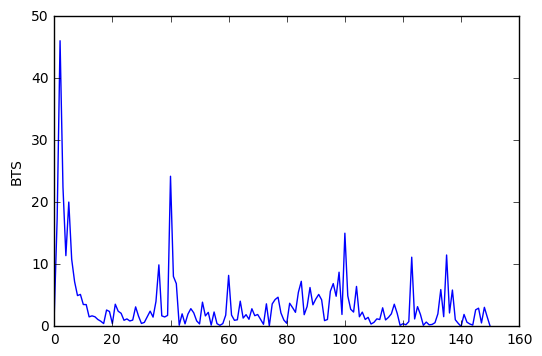

0.2762661813907285 3.5078


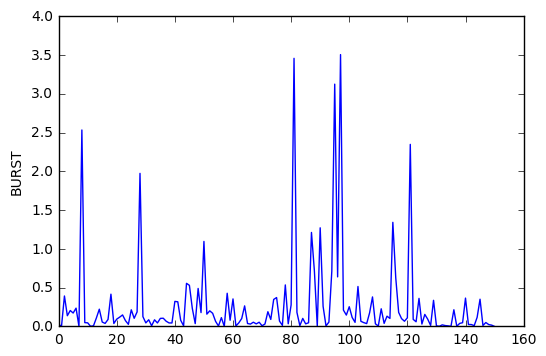

0.17613945430463582 9.3109


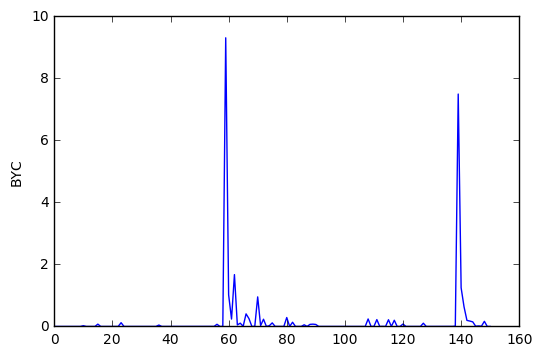

0.03429595814569536 0.7673


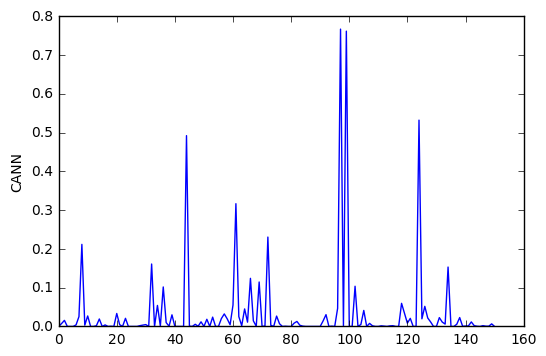

0.5331604750331124 6.5486


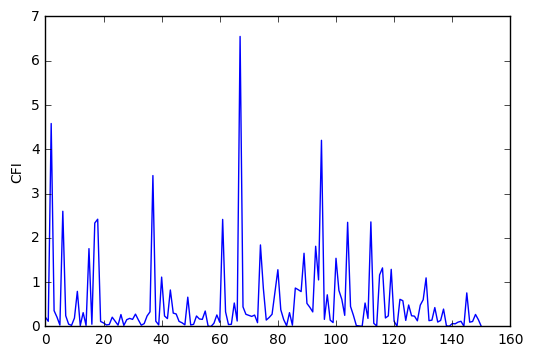

2.625185812516556 96.6896


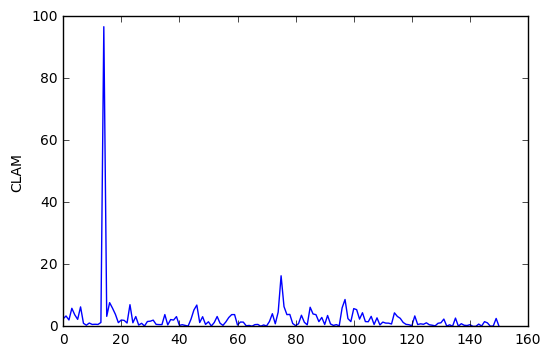

0.07740330397350993 0.8902


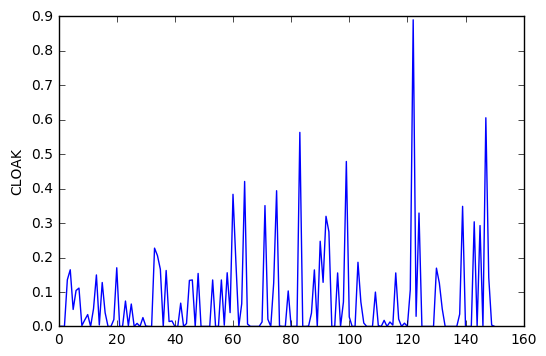

0.016832561589403973 0.8599


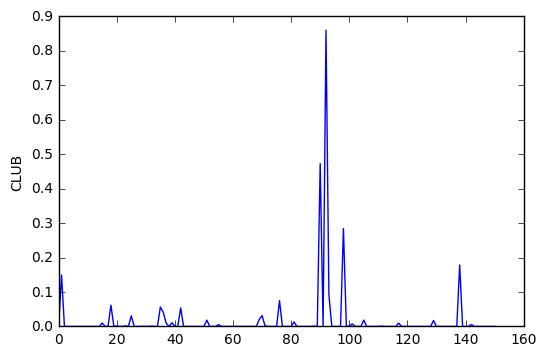

0.033725637086092726 0.9415


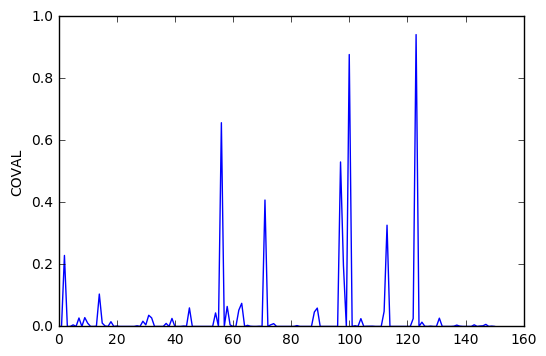

0.016601645430463573 0.7393


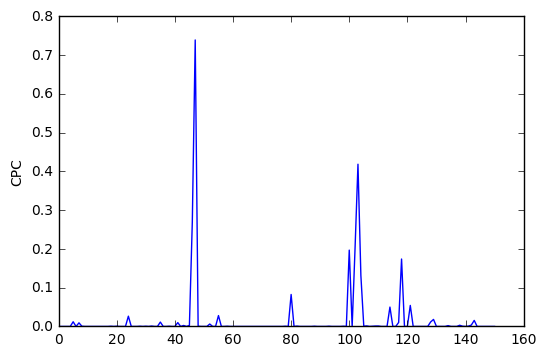

0.1984384543046358 2.21


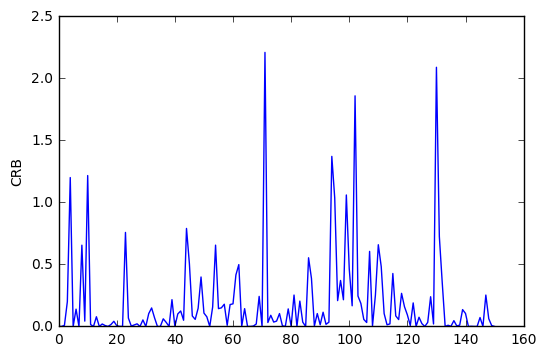

0.05276508079470199 2.36


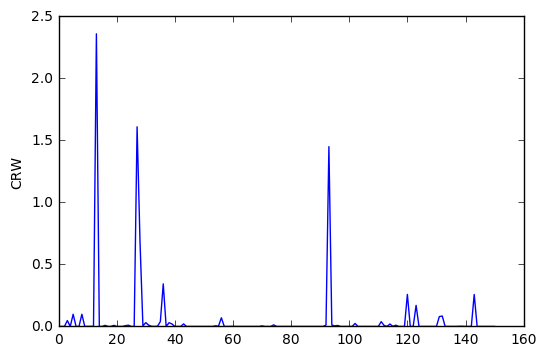

0.015148949668874171 0.5322


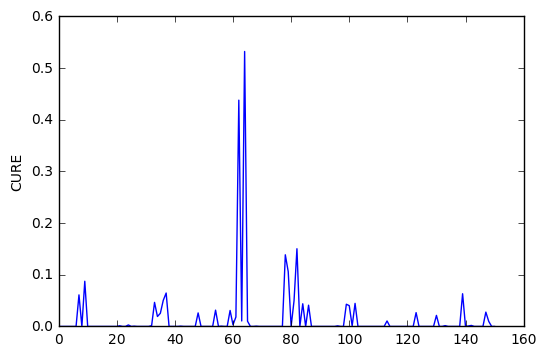

4.737233131788081 47.21


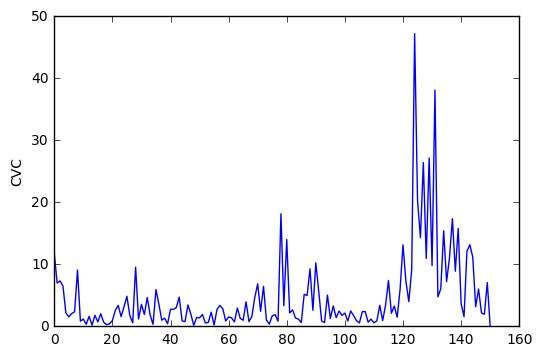

0.010572935761589406 0.776


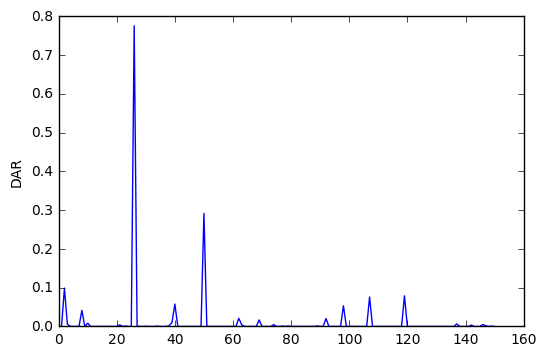

12.337786317880798 81.28


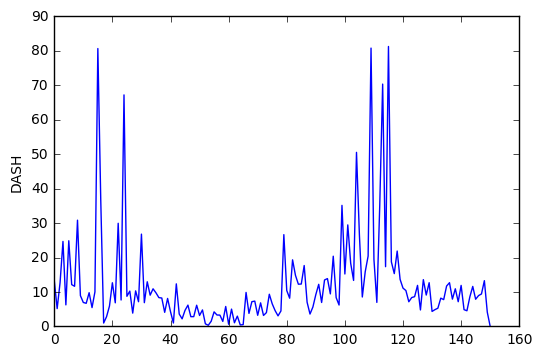

0.7653577437086095 7.5379


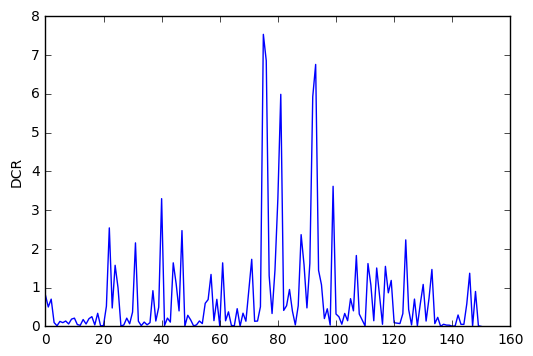

1.56949093423841 10.32286


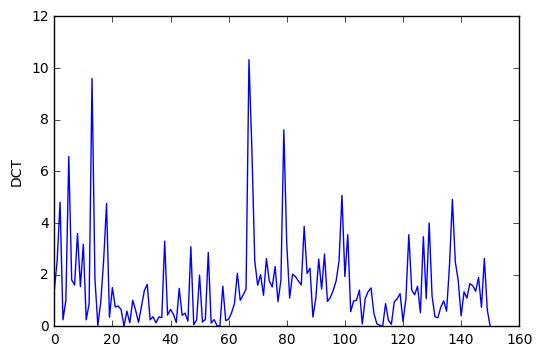

5.2541702947019875 32.59


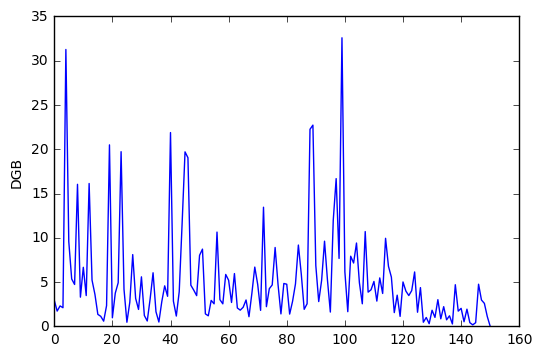

0.17417746490066213 6.4504


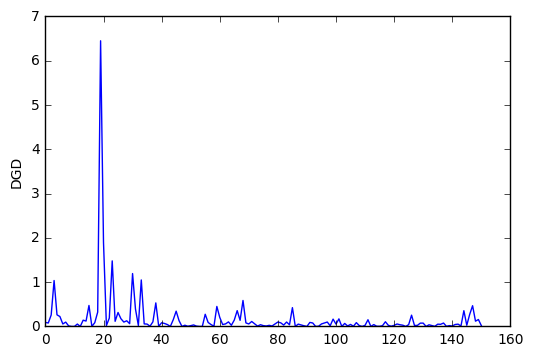

0.03965082119205301 2.36


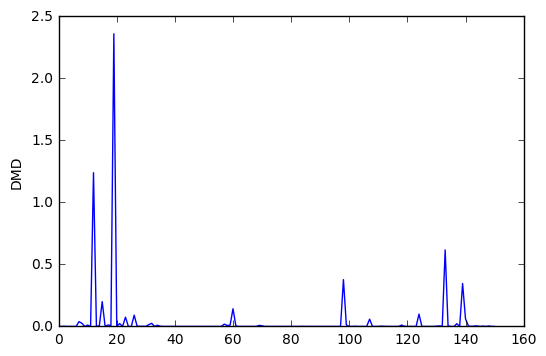

1.3882045582119207 15.53473


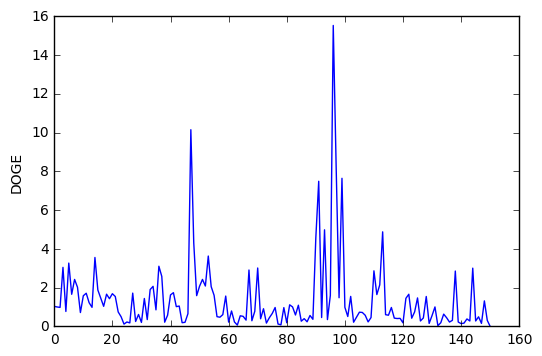

0.03544449602649007 2.2751


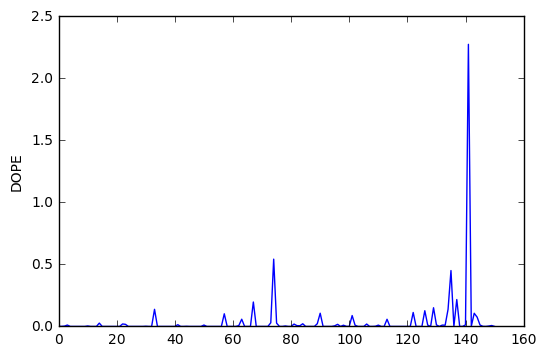

0.09034410860927157 3.6444


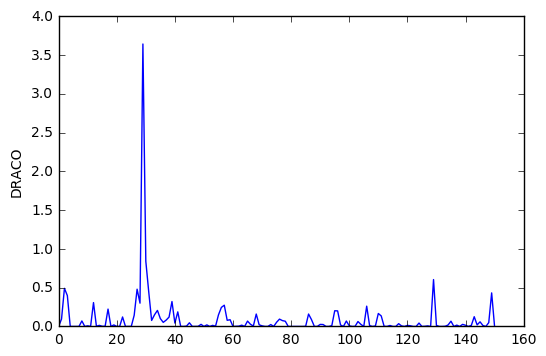

0.11951759046357616 2.17969


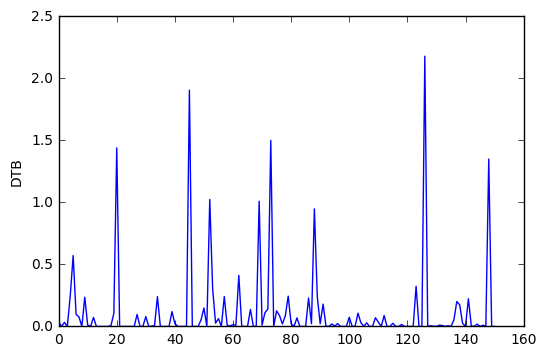

0.11939590000000003 3.09105


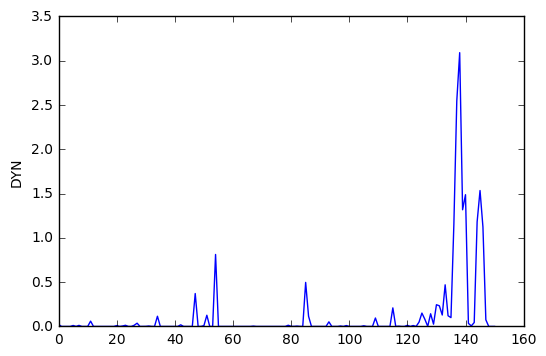

0.010956204635761586 0.5084486


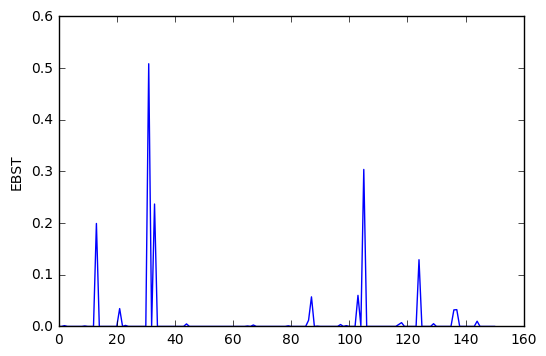

0.5265684046357614 10.30725


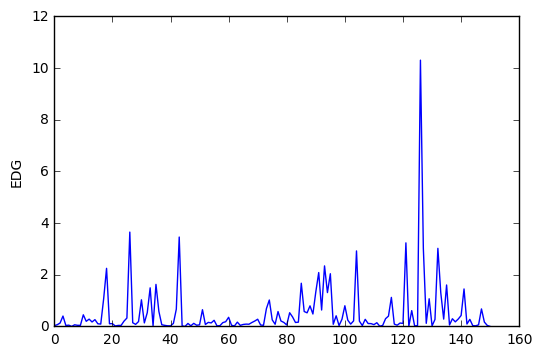

0.01282516377483444 0.5807


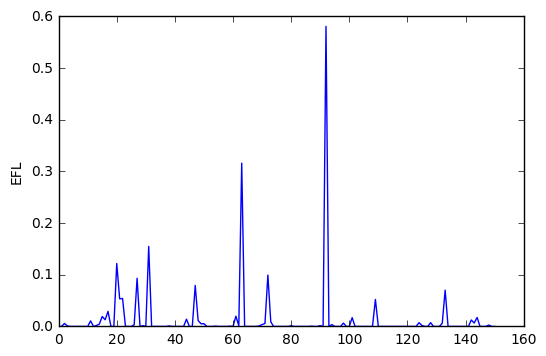

0.001999753509933775 0.07188


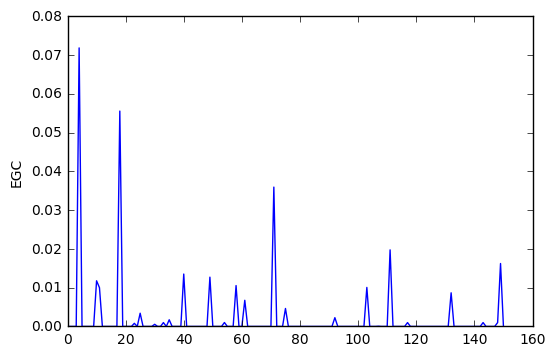

0.0196130361589404 0.24605


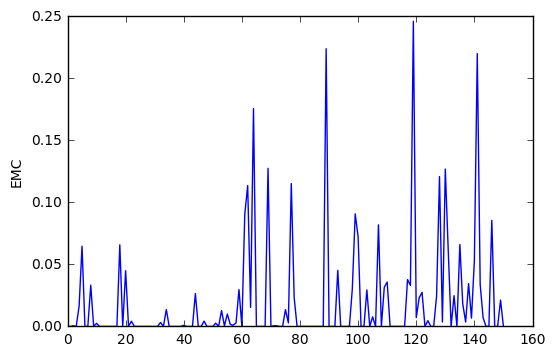

1.0143693374172191 9.41104


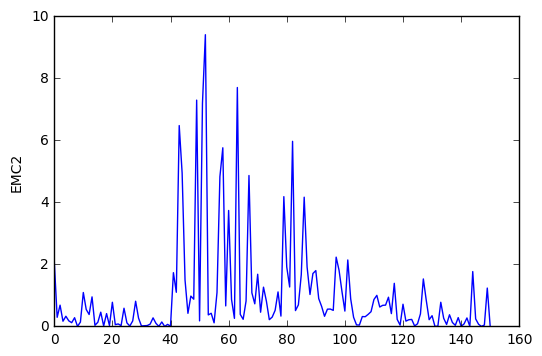

0.03109628741721855 1.3872


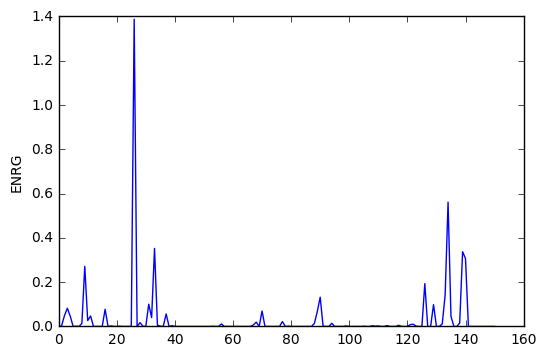

0.0046590119205298 0.25868


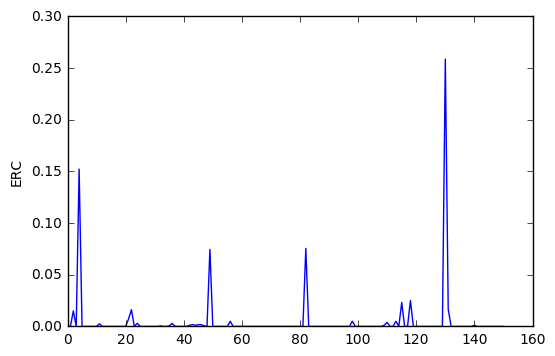

6.1020673377483465 40.1743


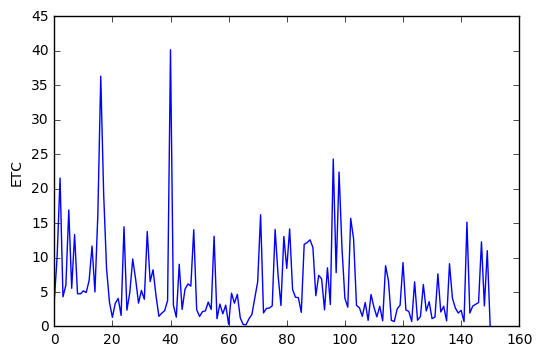

144.79210264900664 455.53


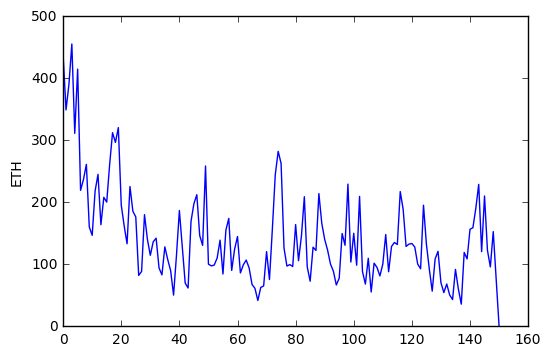

0.017131126490066227 0.4013


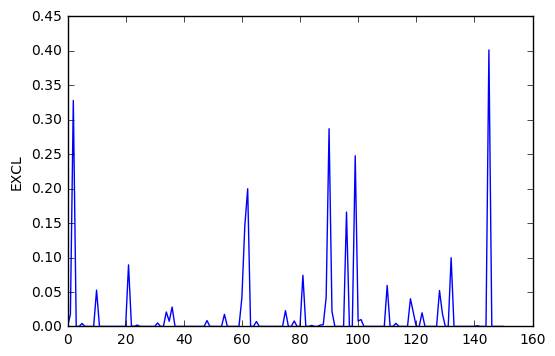

0.16606281821192054 2.12637


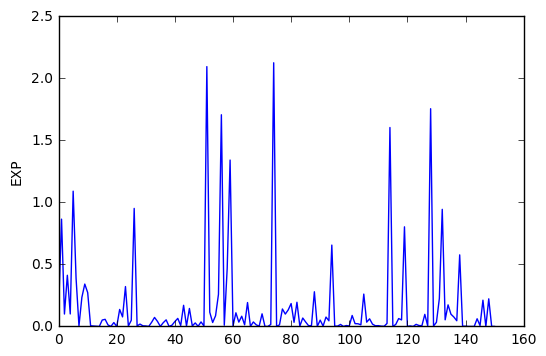

0.01196874324503311 0.5011


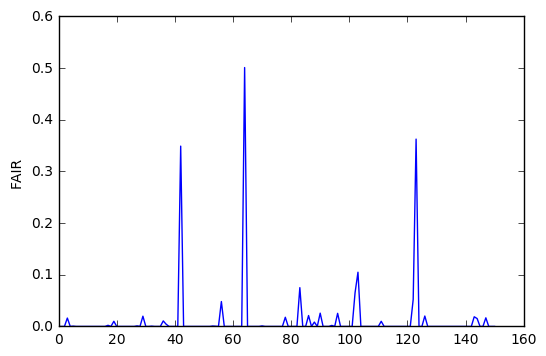

1.9309476939735104 22.93026


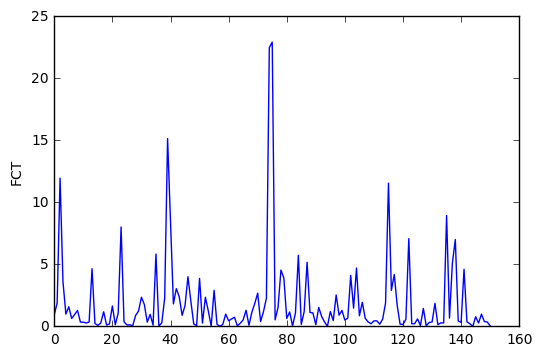

0.17935241754966885 10.1747


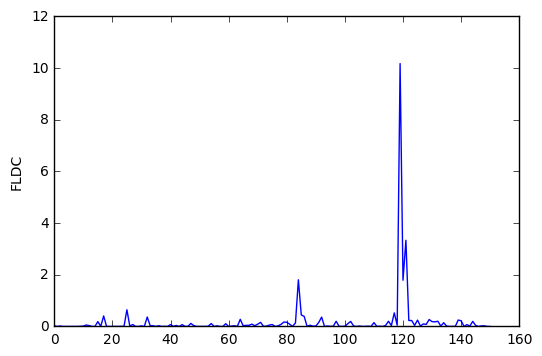

0.09192308662251658 2.3203


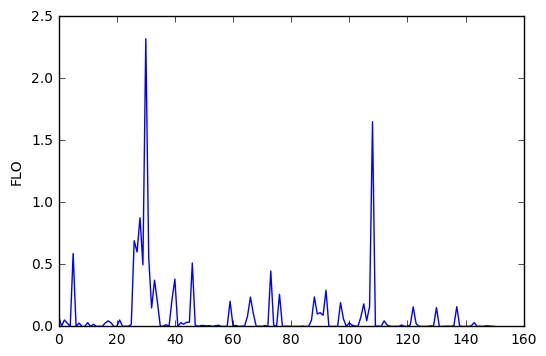

0.05288831655629138 4.32


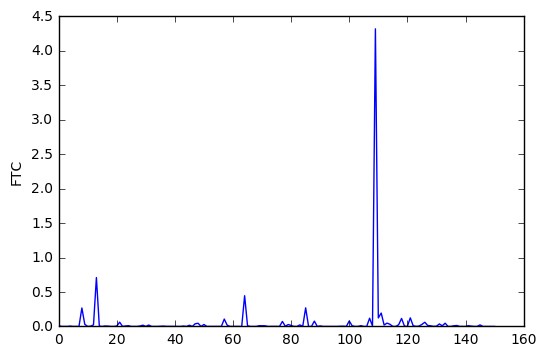

0.6065232580132449 13.099


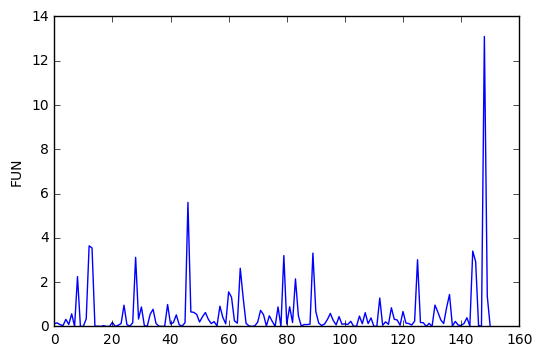

0.01657520860927153 1.14


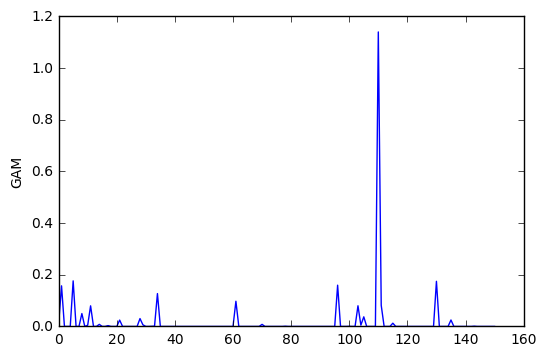

1.1408471695364235 9.4505


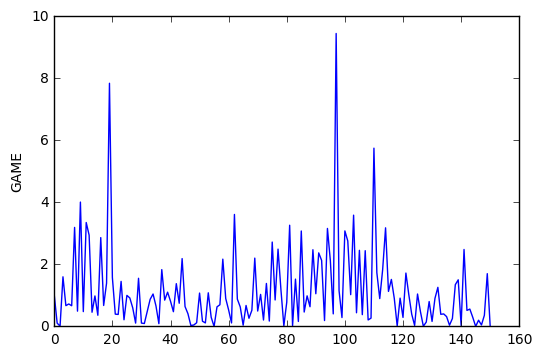

0.005390078145695367 0.23231


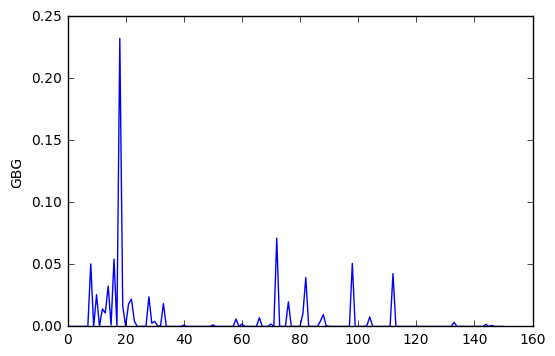

1.0066807306622518 28.60986


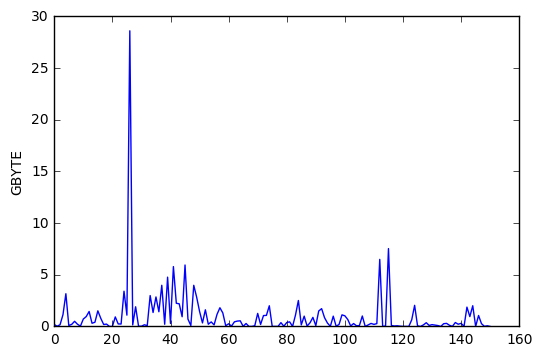

0.007230675629139073 0.29267


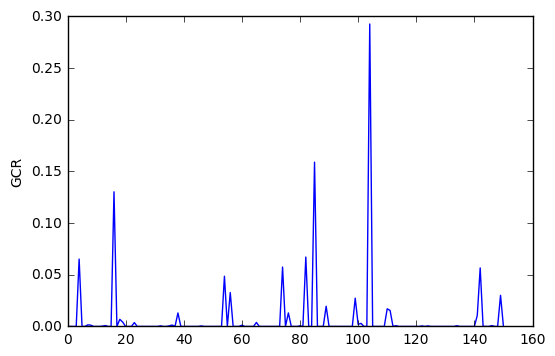

0.026232364238410598 0.9596


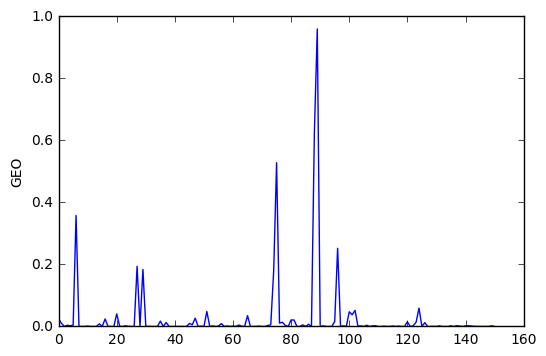

0.011124757682119199 0.21


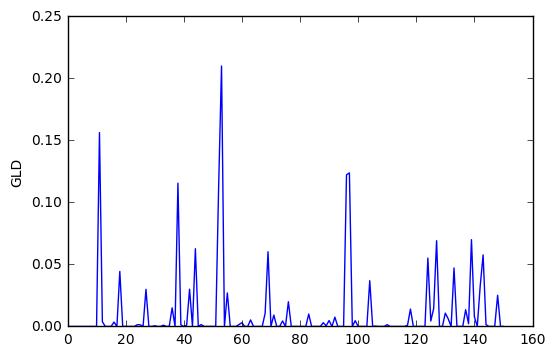

0.3700073788079471 10.496597


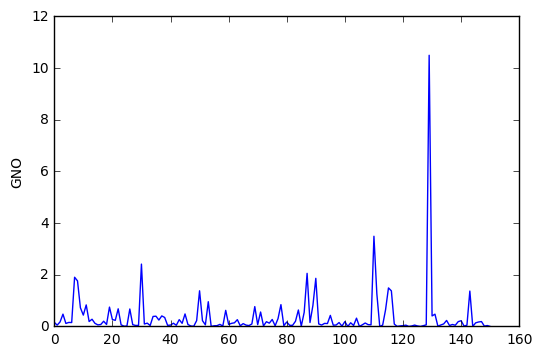

2.2109774834437084 11.549


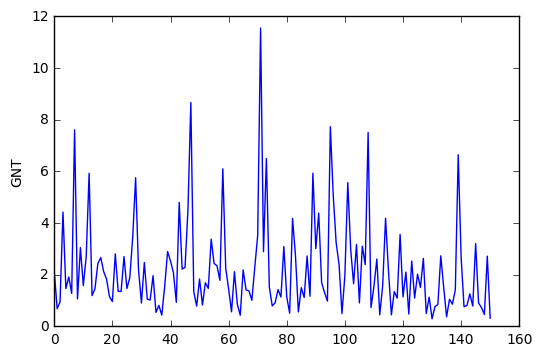

0.10082978920529803 3.4982


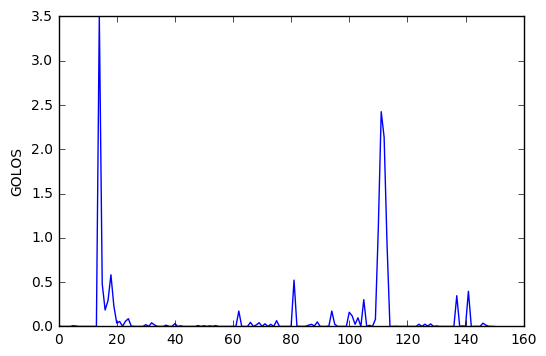

0.08757943721854308 3.0888


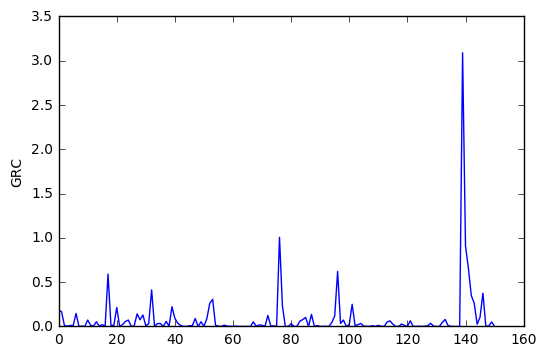

0.0351467025165563 1.7552


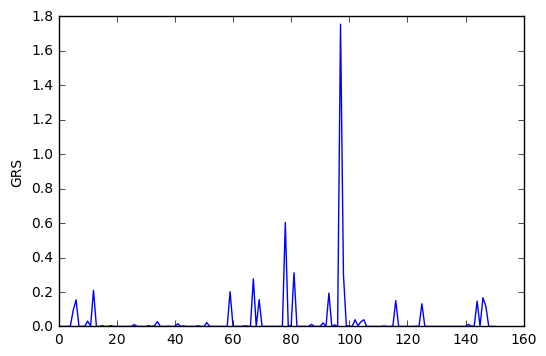

0.3124894384105959 11.03816


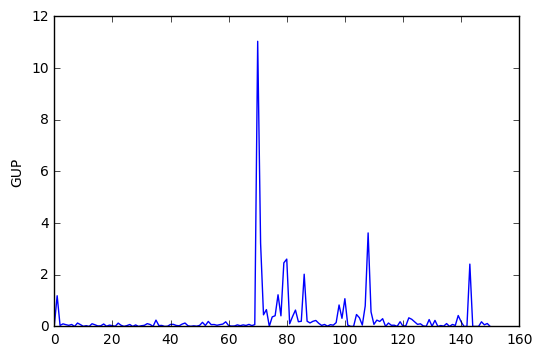

0.0039031807947019874 0.2357


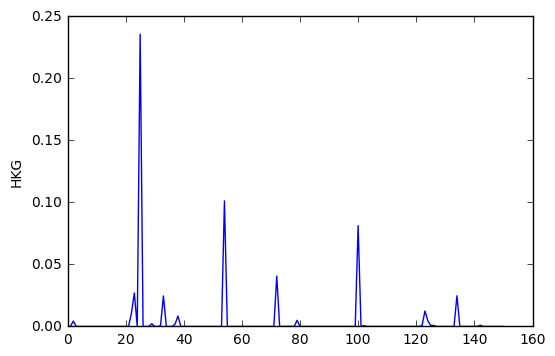

0.21245421456953642 9.87924


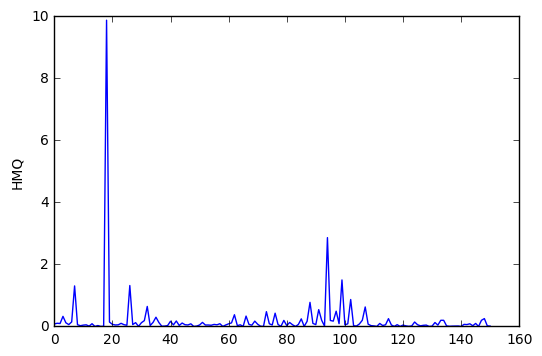

0.04784906490066224 0.50008


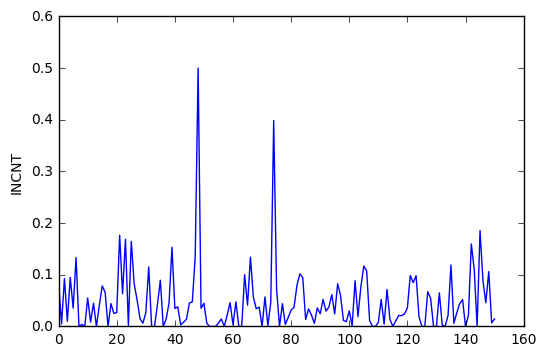

0.007842317880794704 0.1919


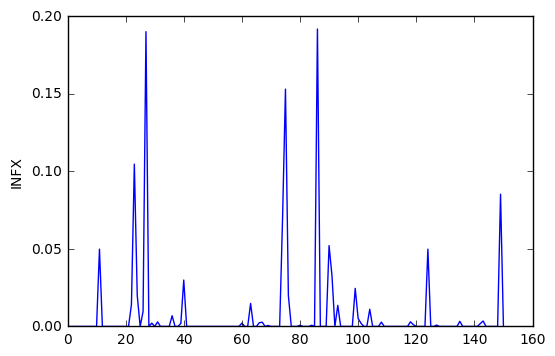

0.05979824238410597 2.19868


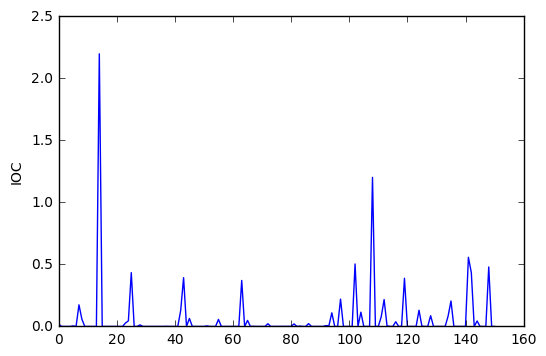

0.023975033774834436 0.77879


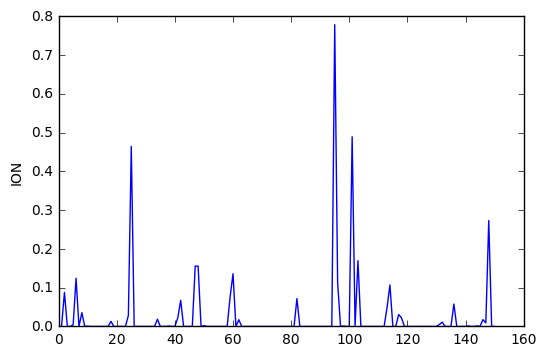

0.004527931721854304 0.19616


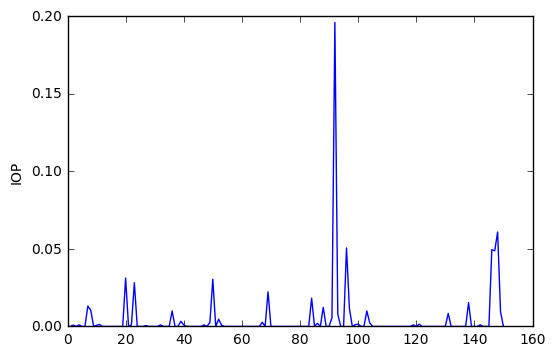

0.8539945747682123 12.0177


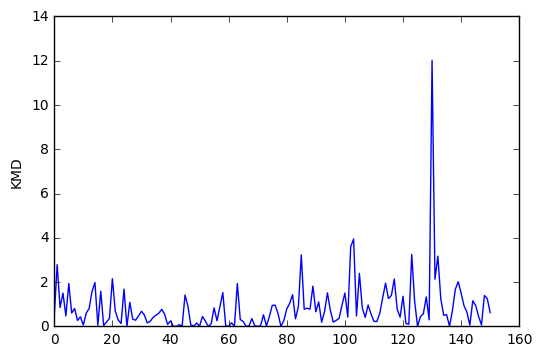

0.04039212251655629 1.6168


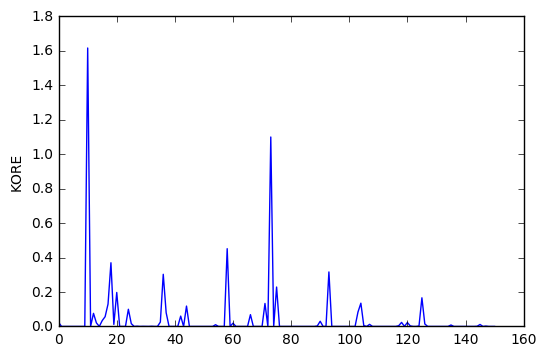

1.3874987741721854 12.2234


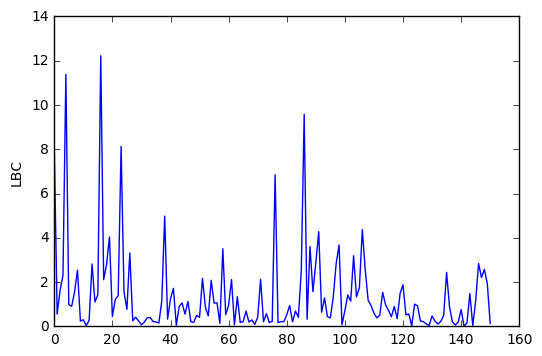

0.32606794238410597 5.2462


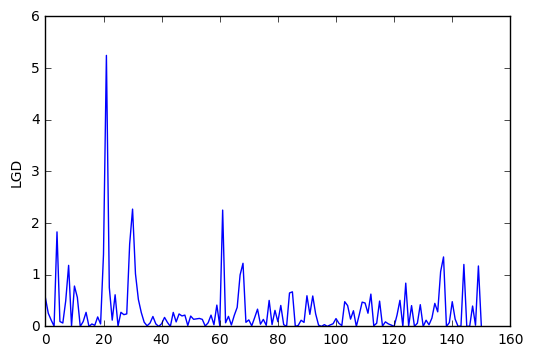

0.02299378211920529 0.6734


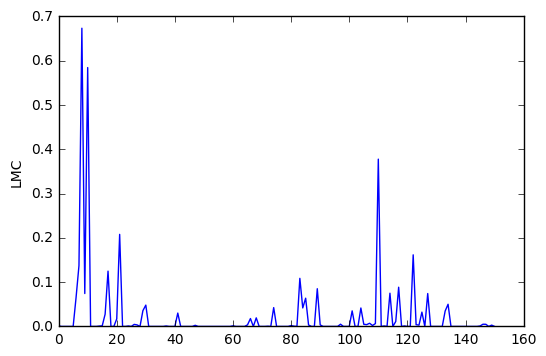

1.241053815231788 14.0277


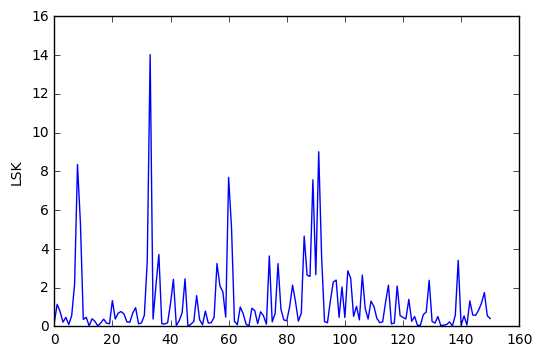

25.30587754768212 138.17


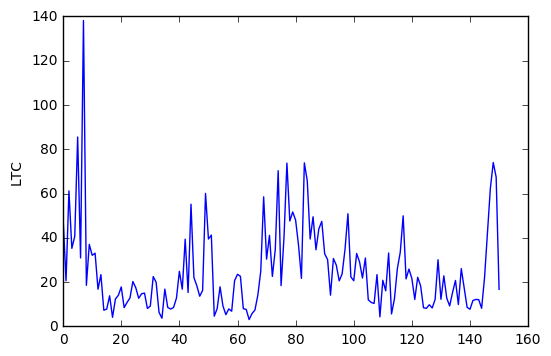

1.6981544450331123 22.54962


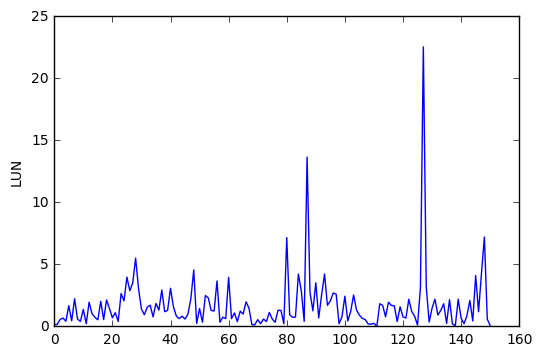

1.3318406264238414 20.93


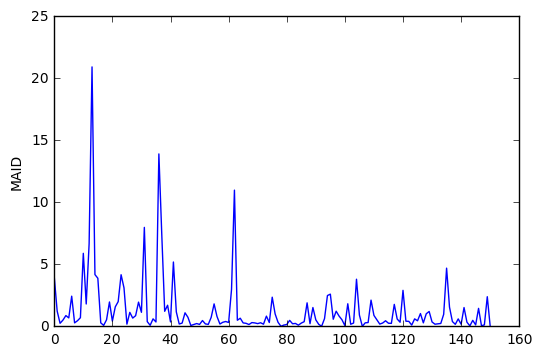

1.242624658278145 9.6445


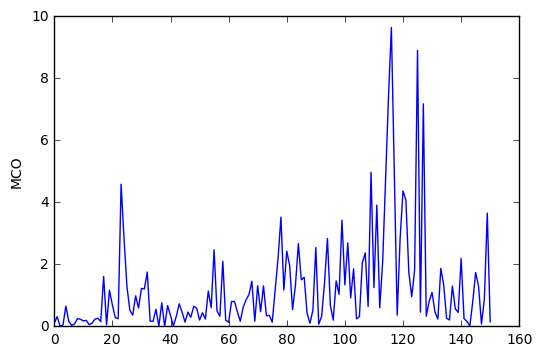

0.022074689403973512 0.6171


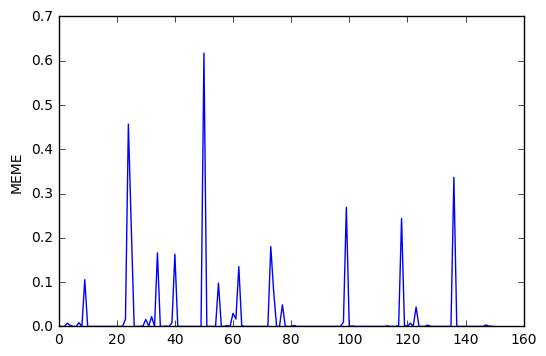

0.24217199006622508 12.11


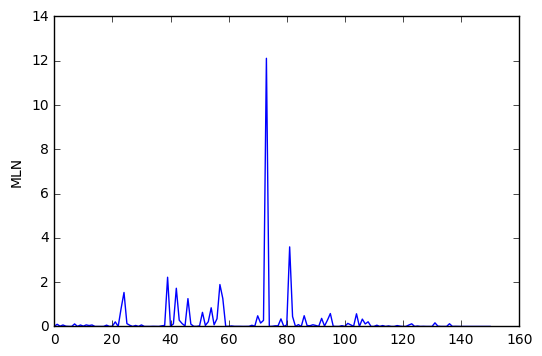

0.07650643701986759 1.3475


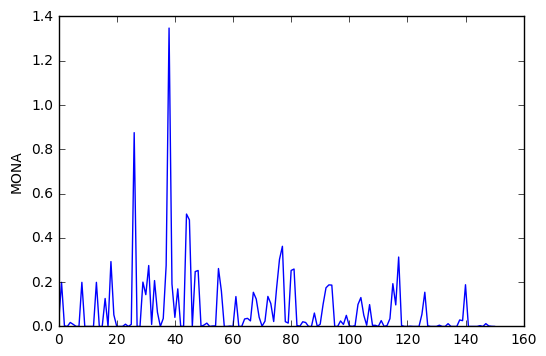

1.161942500662251 9.1219


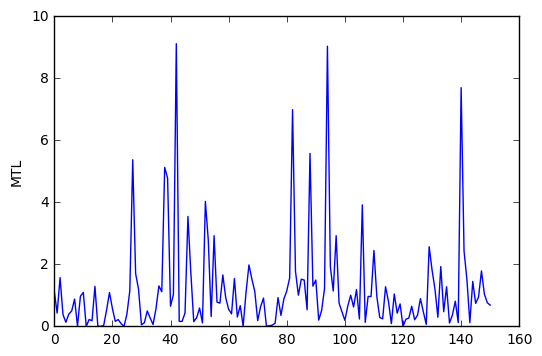

0.047966781456953655 1.308795


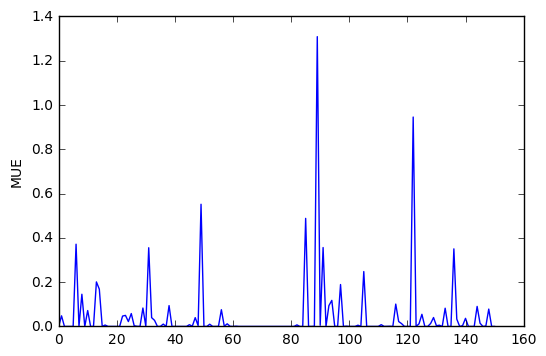

0.055344521788079463 2.0035413


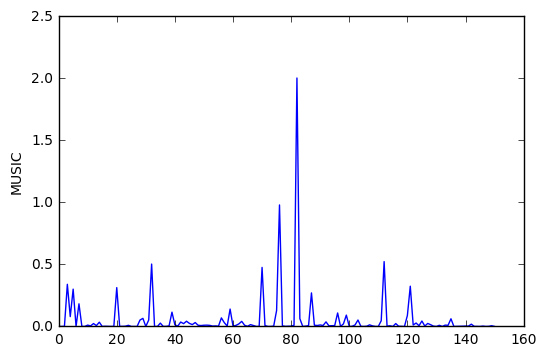

0.23659180185430462 2.73464


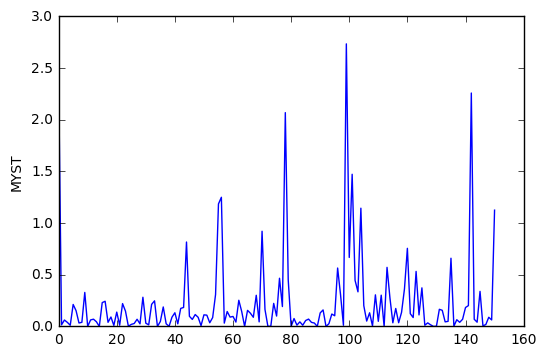

0.05633665814569536 2.0306


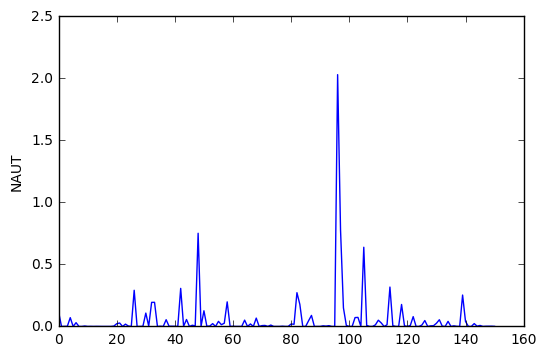

0.1333306169536424 3.88


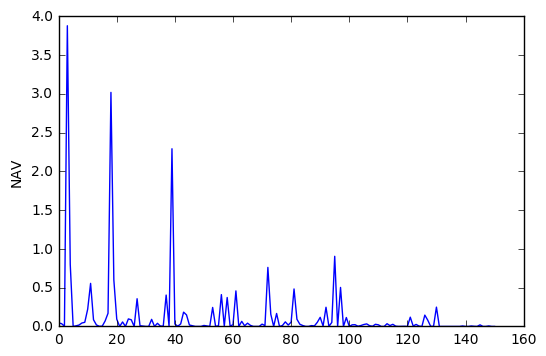

0.10578600529801324 4.09


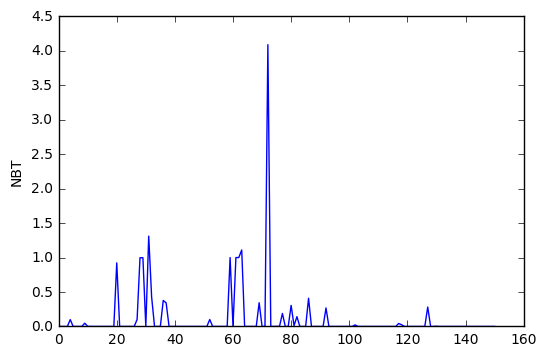

94.14625231788084 484.14


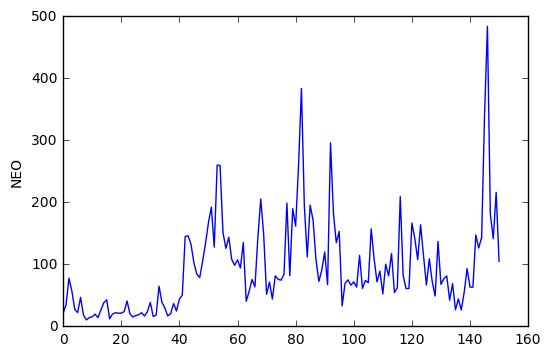

0.09232910754966885 1.7381


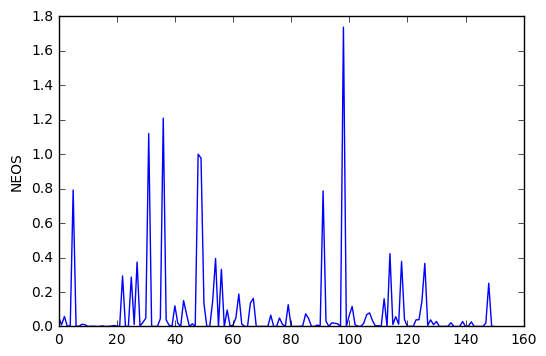

0.13866810993377482 3.3633


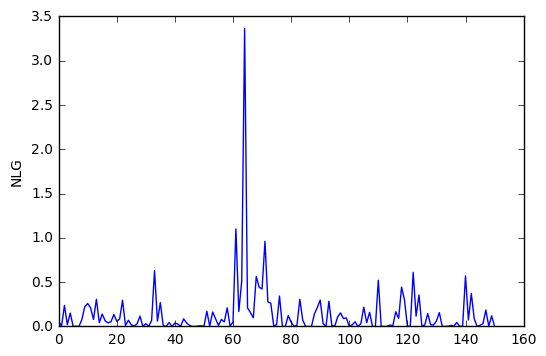

0.5157685178145697 5.0311279


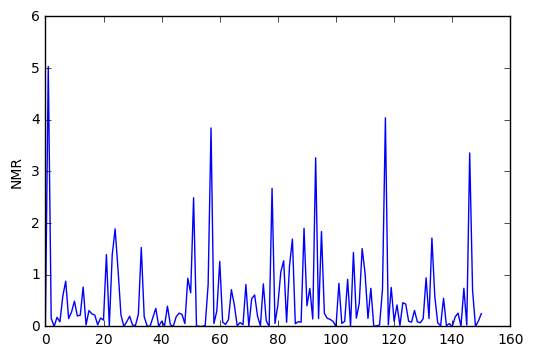

0.45605258476821187 4.16657


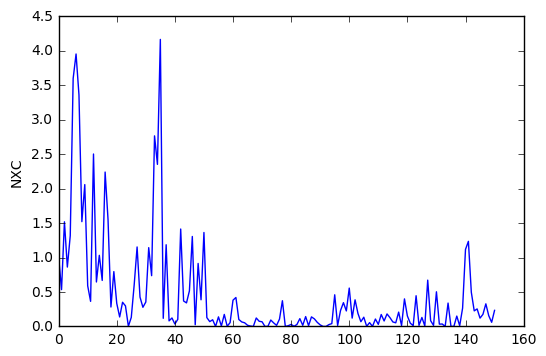

0.7513784914569529 7.0036


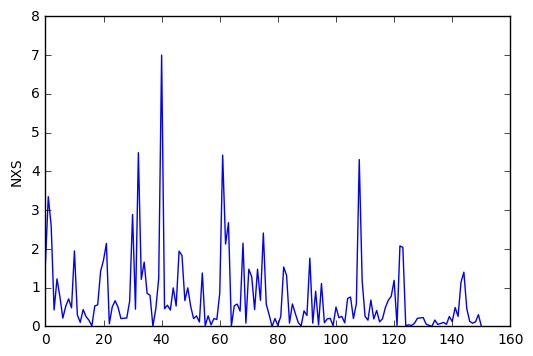

2.8641474039735106 16.19


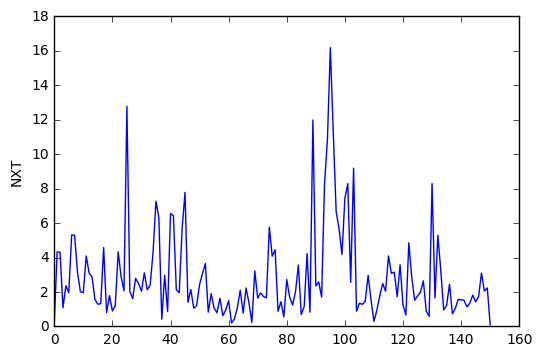

0.055352435165562916 3.10872


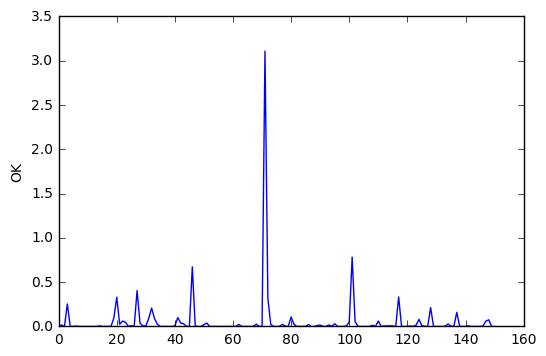

21.570113774834443 131.05


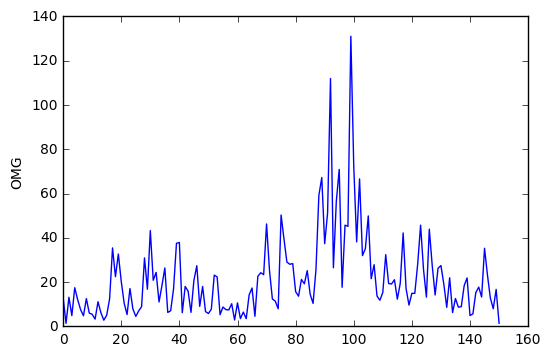

0.14511197417218547 2.119303


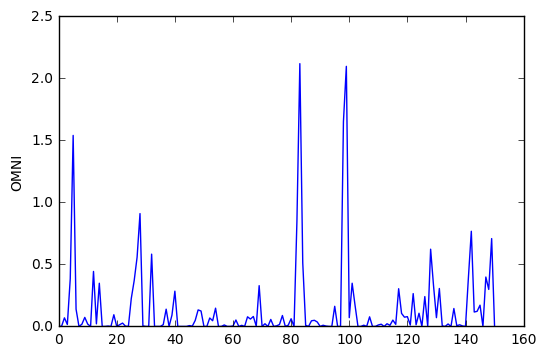

0.26400358761589415 3.7765


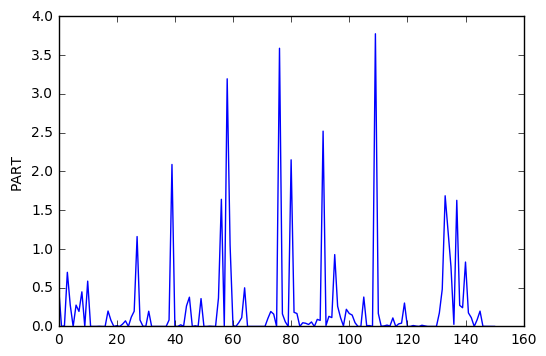

10.450201986754974 42.95


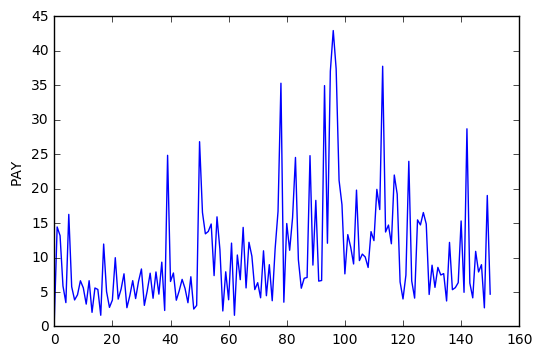

0.2134238746357617 2.3082


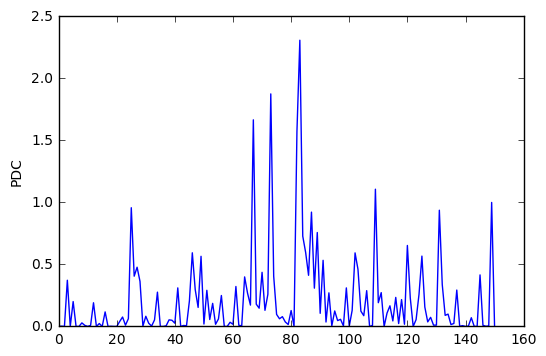

0.07089347569536422 1.683943


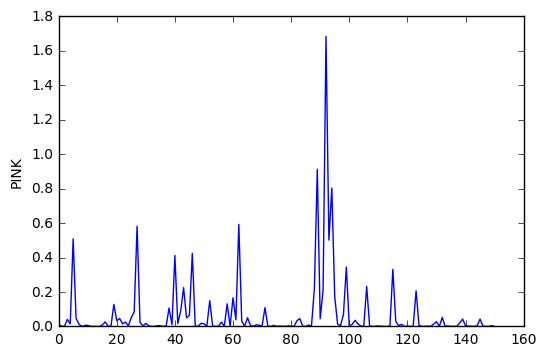

0.6009805947019866 4.700564


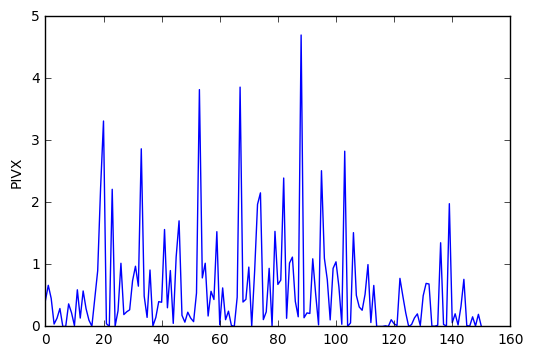

0.015876820529801324 0.892274


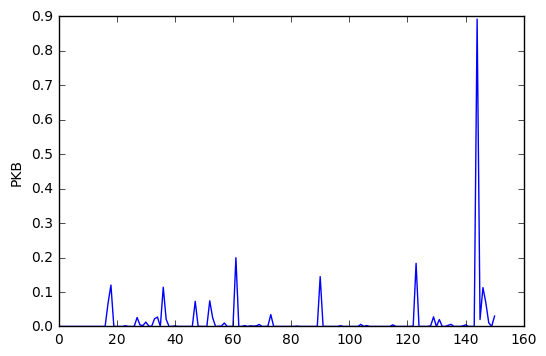

0.08250202119205294 1.1


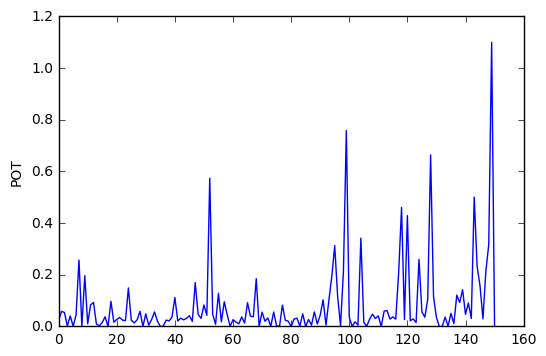

0.1512469676821192 4.1509


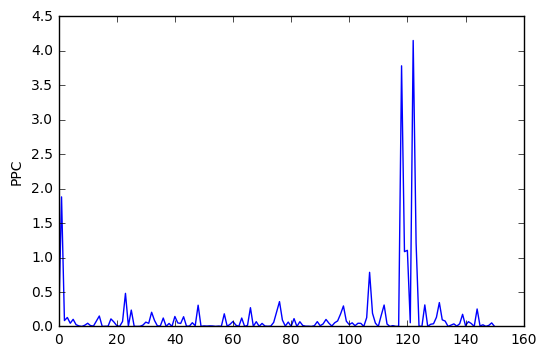

0.04656145894039737 4.2356


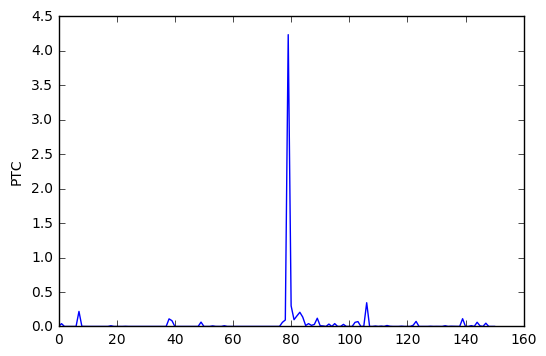

0.41386254371258285 4.83


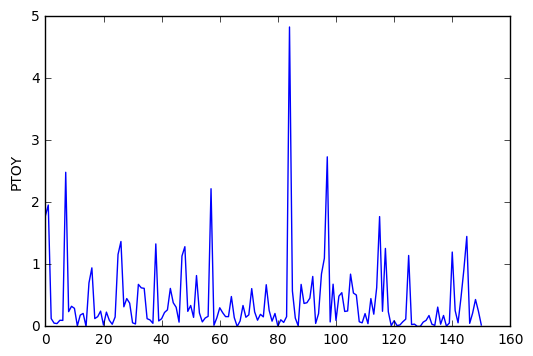

0.2331571158940397 2.557


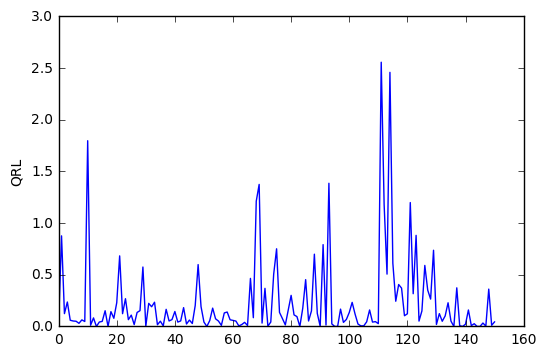

4.832043900000001 21.6539


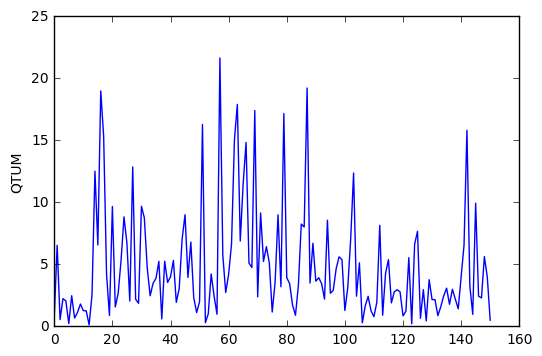

4.2590681205298 23.17


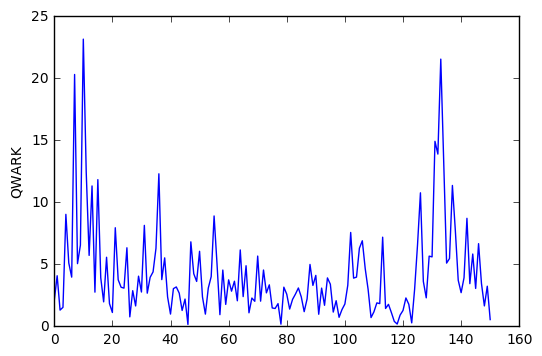

0.49544192582781454 5.18622


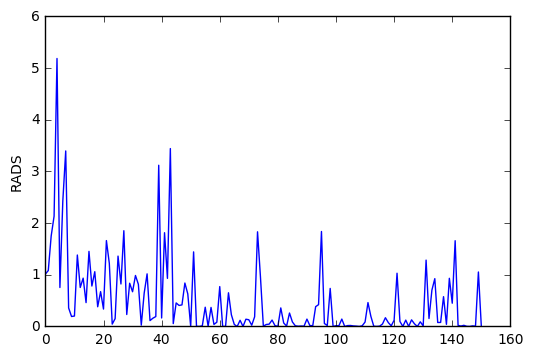

0.0019272860927152314 0.09954


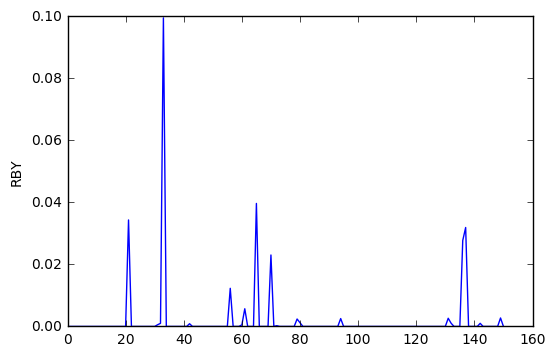

0.509612585165563 14.90619


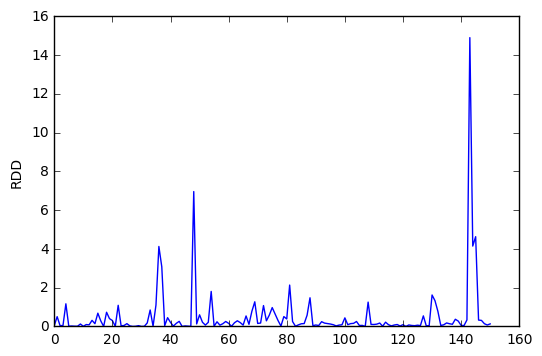

0.6008557036423843 11.896372


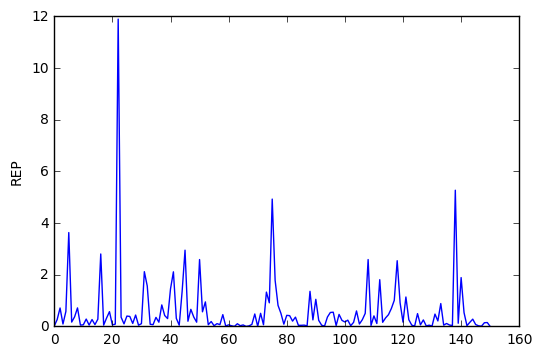

1.8374122271523183 10.7


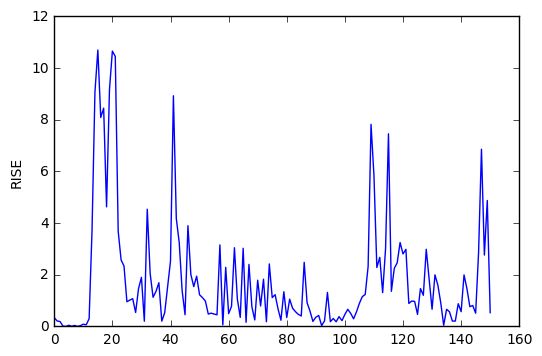

0.39696180993377483 4.56112


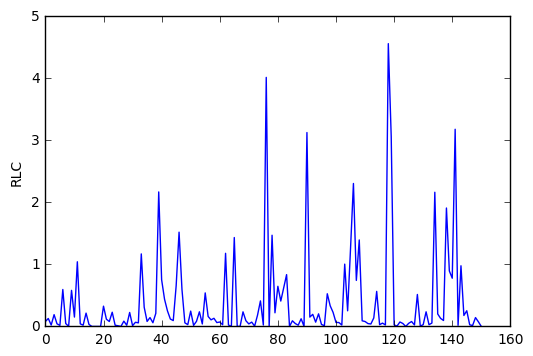

0.86396460807947 12.61314


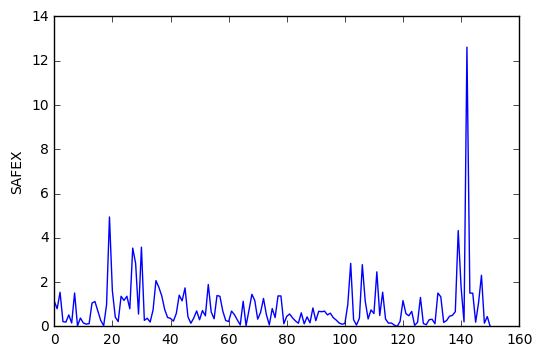

0.05837881059602648 1.186


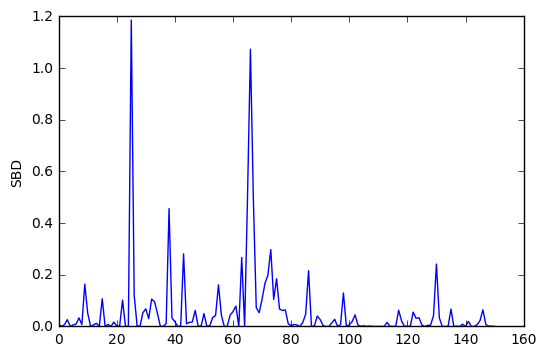

4.162026703311256 46.56


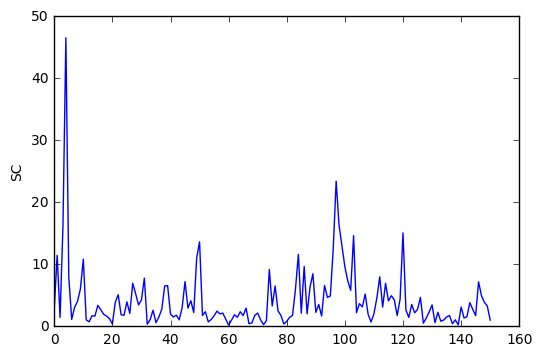

0.016946258940397353 0.6174


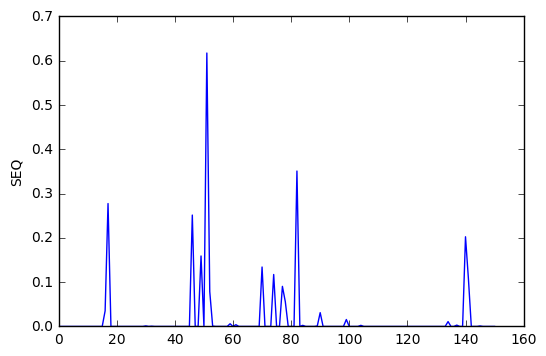

0.20021140576158944 11.0508905


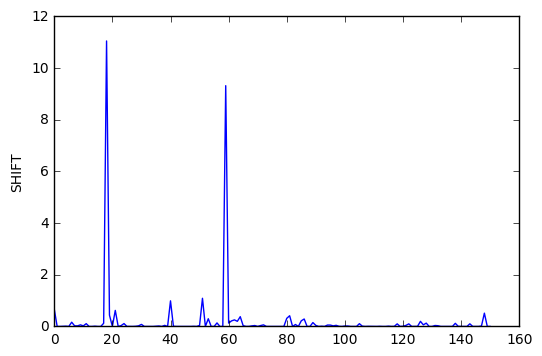

0.03469120463576158 0.82143


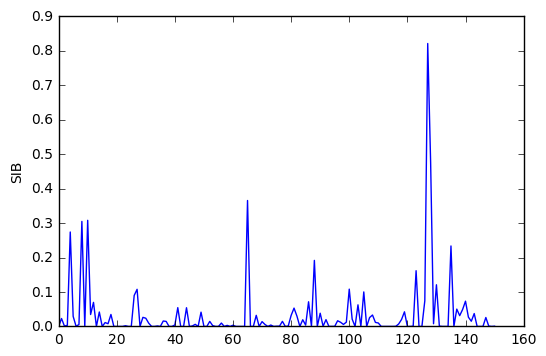

0.0065589922516556265 0.3763


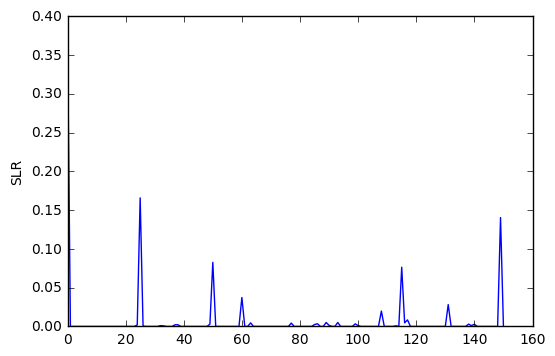

0.1905632874172185 1.86495


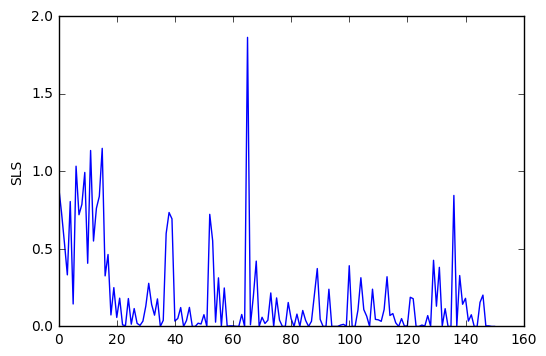

0.2052978014569536 2.11632


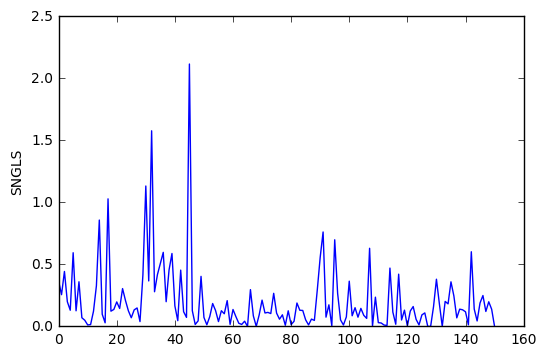

0.006199073509933775 0.2411


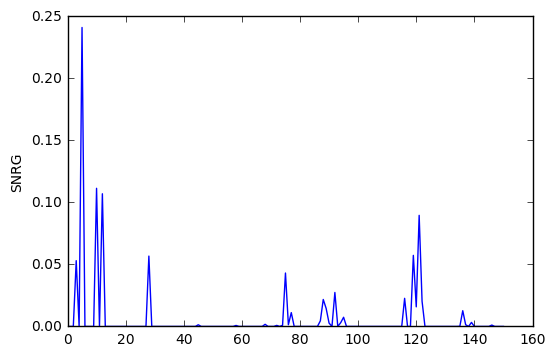

1.1986045993377485 7.8016


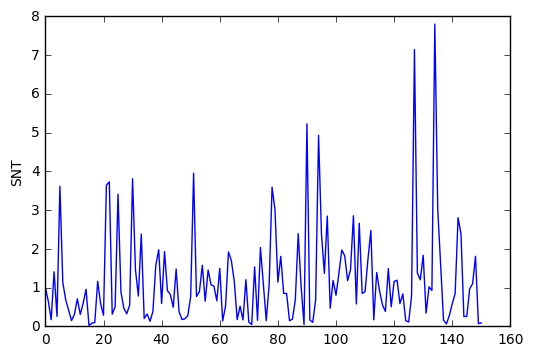

0.024746974834437094 0.6174


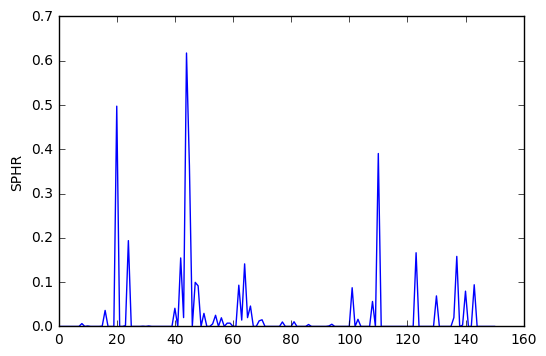

0.05090393880794703 3.21


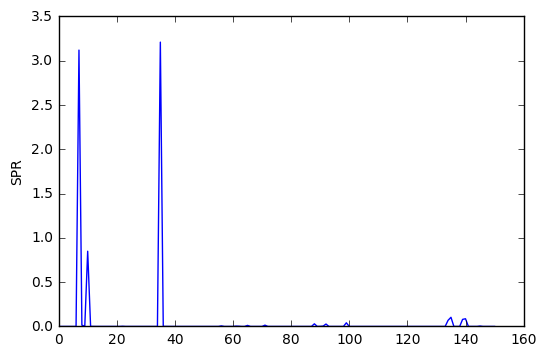

0.020544635894039737 0.2256


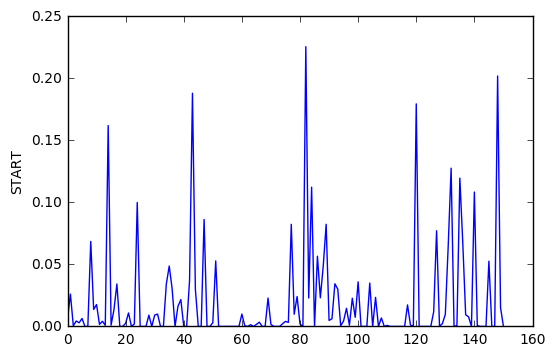

0.6791093456953642 3.84128


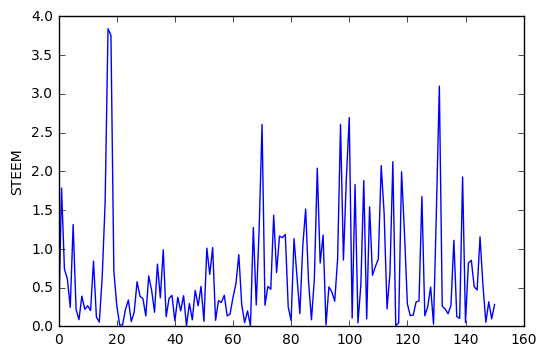

5.624187532450333 74.53


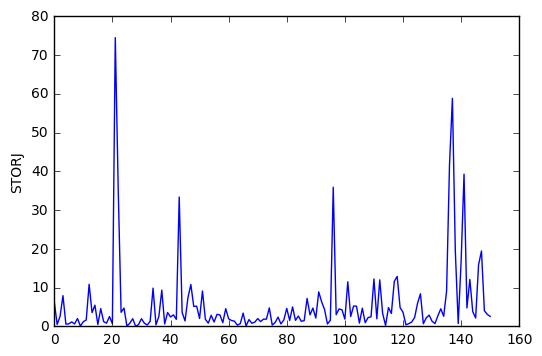

13.826923509933774 59.97


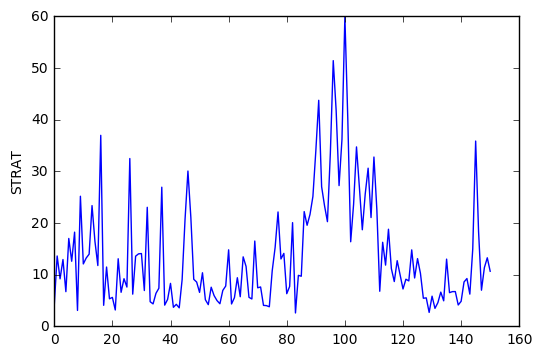

0.022946613245033116 0.76323


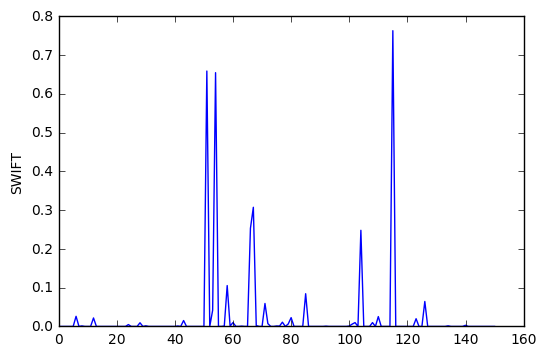

0.09191802913907288 2.7731


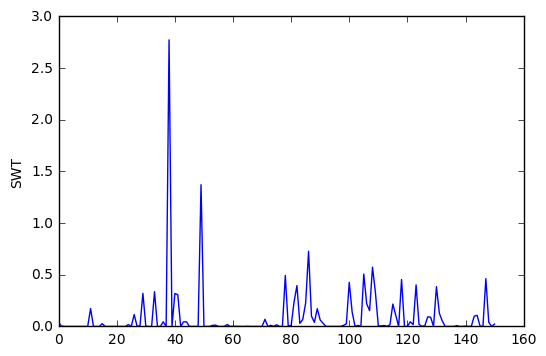

0.06221187211920527 0.7795


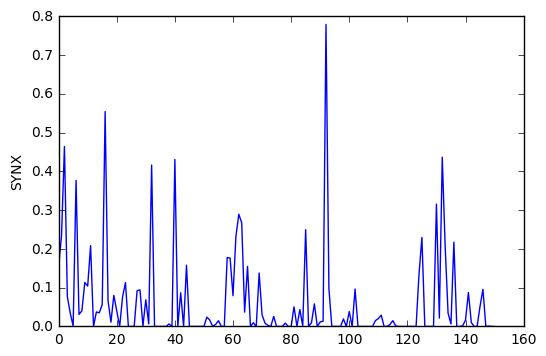

0.834538181258278 12.3459


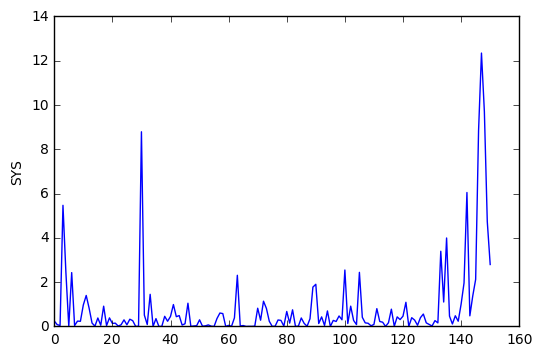

0.016490400662251655 0.5107


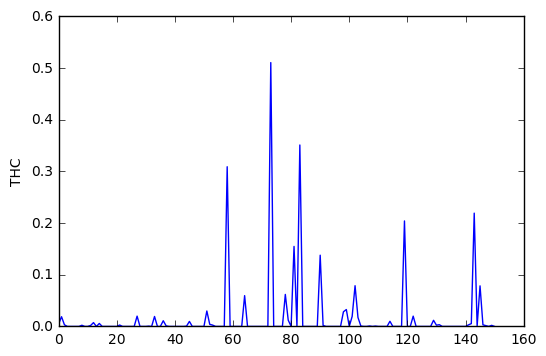

0.13684893112582783 1.76051


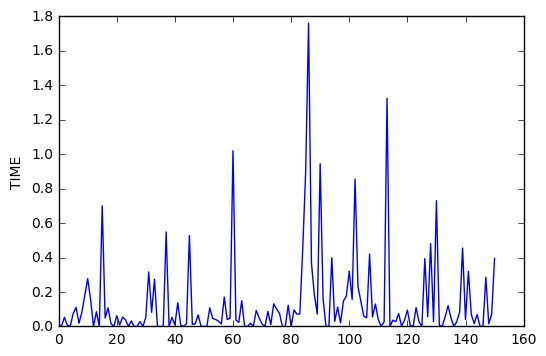

0.22506713377483448 3.21998


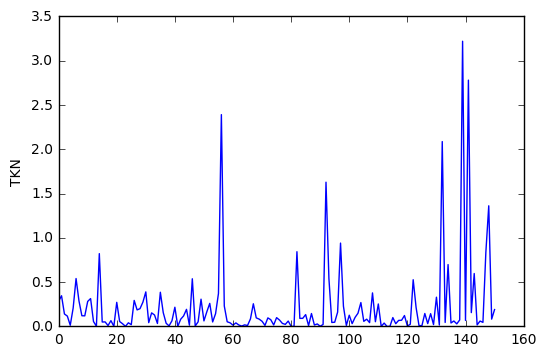

0.17566772417218549 1.940612


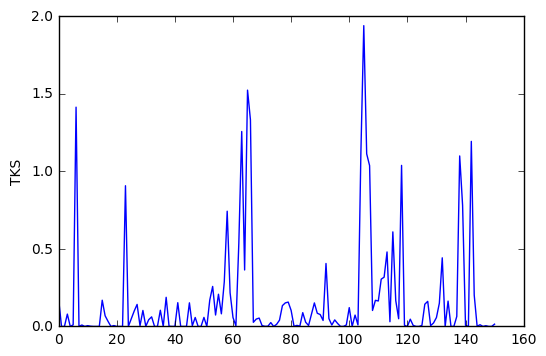

0.006671584105960264 0.1467


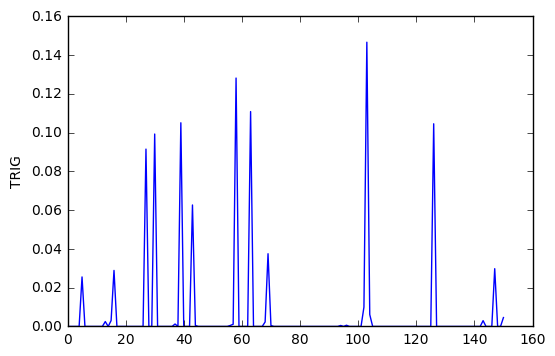

0.17622649874172194 8.86406


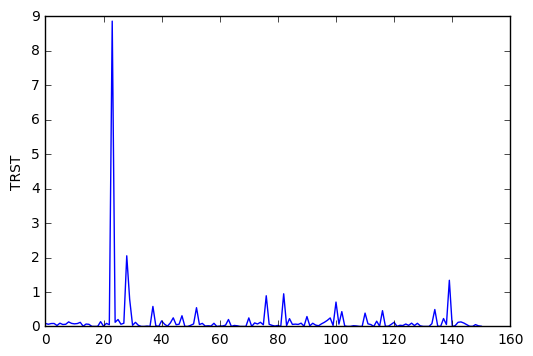

0.004086625695364238 0.2839


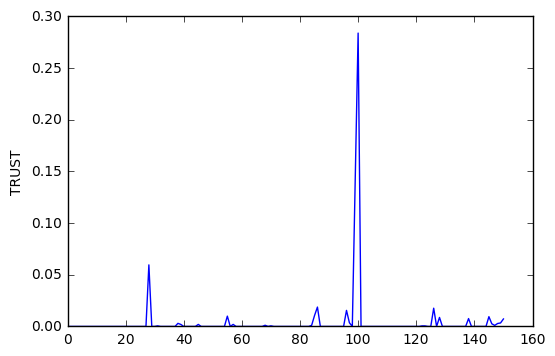

0.020541616556291394 1.51


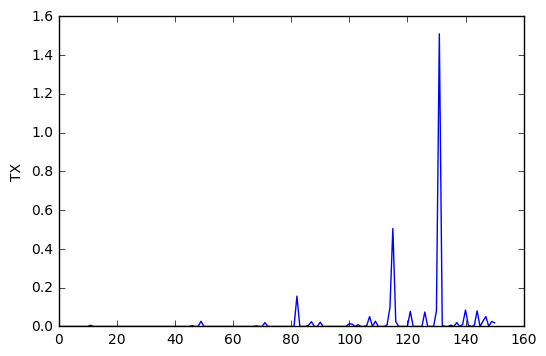

0.19149598211920535 3.41605


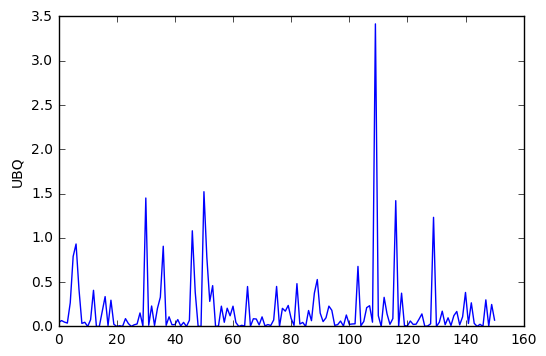

0.026409576158940393 0.5537


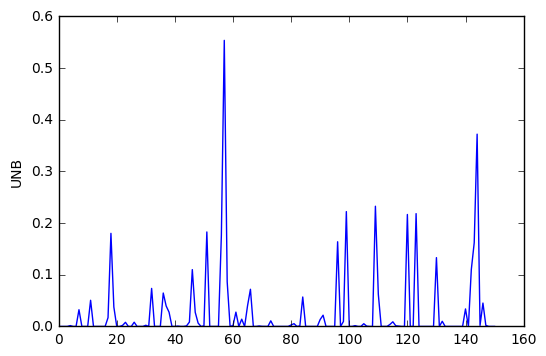

0.013415879867549666 0.3432


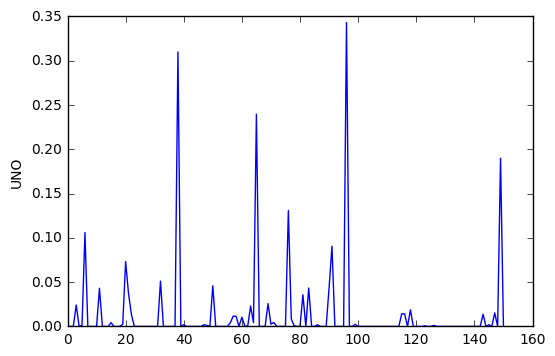

0.2658624781456955 4.2228


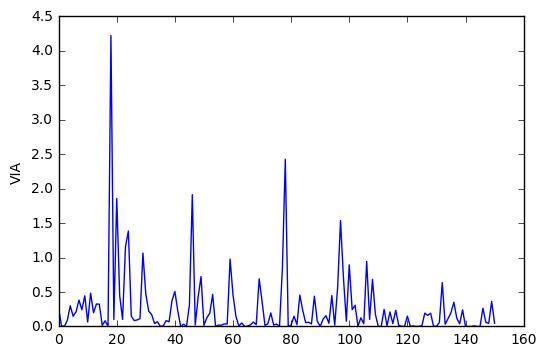

0.14159250463576167 1.81


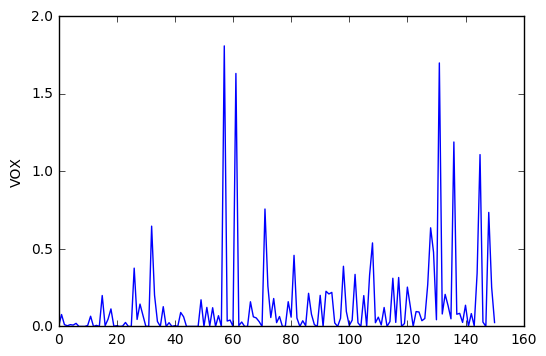

0.0415863715231788 1.122433


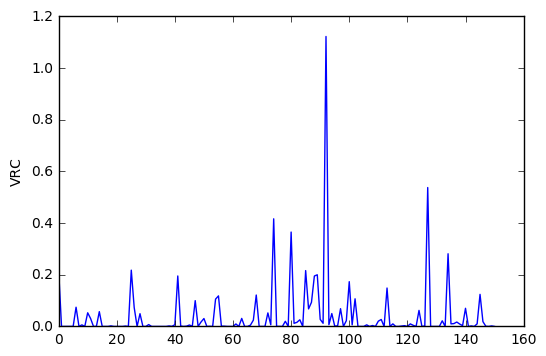

0.043806378807947015 0.59111


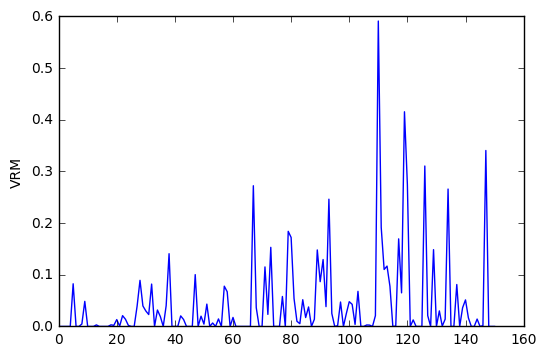

0.19544087092715232 4.8974266


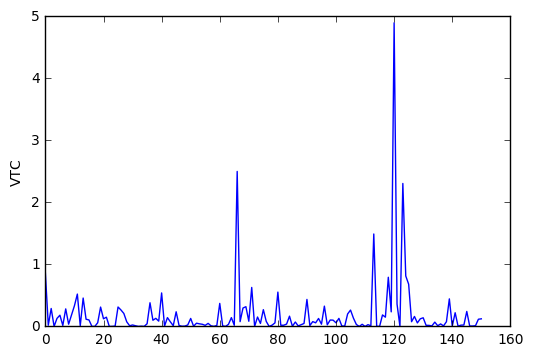

0.020342941721854305 2.50165


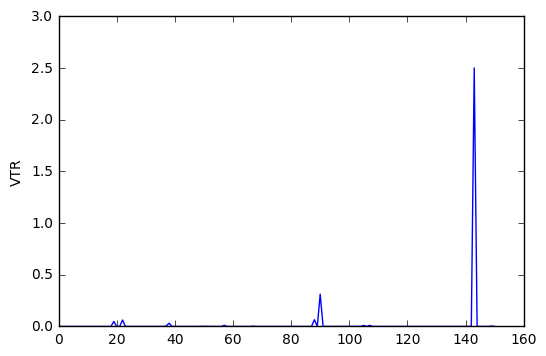

8.186515821192053 358.5608


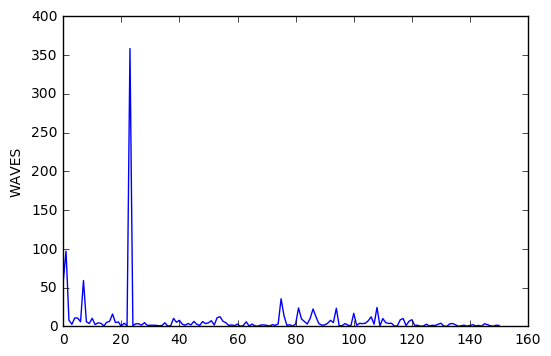

0.3559131664900662 3.9942


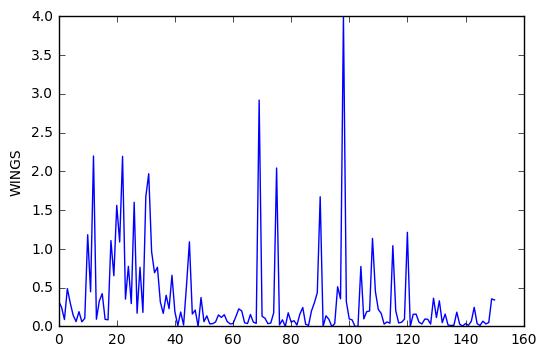

0.12310321456953645 8.8


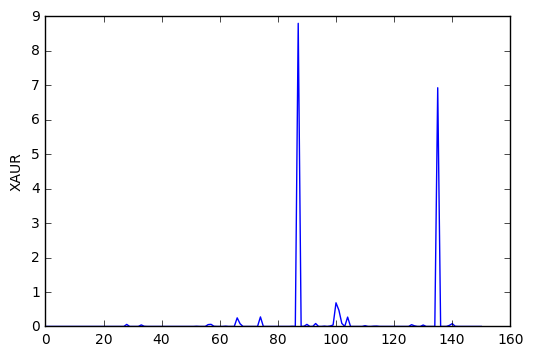

0.0 0


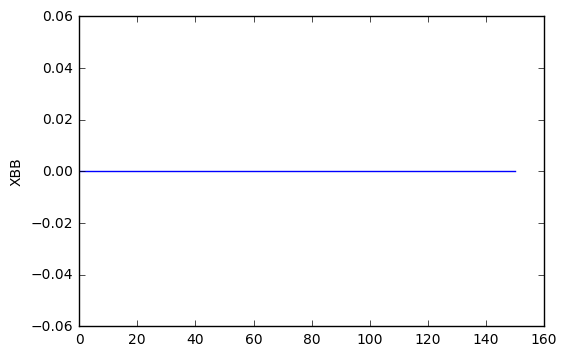

0.05803747317880794 1.83461


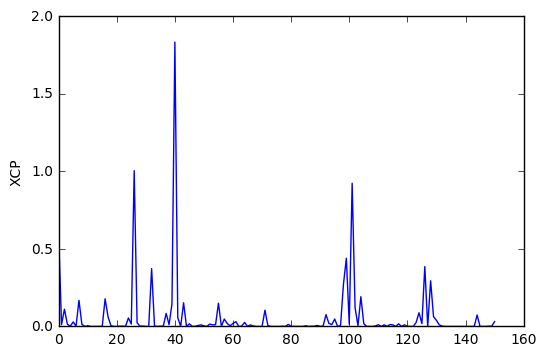

0.48642282251655644 1.6013


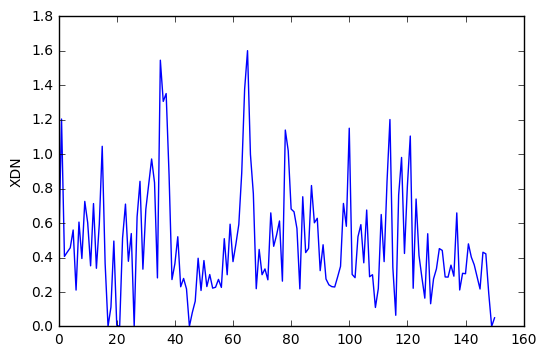

1.2915171602649018 17.18


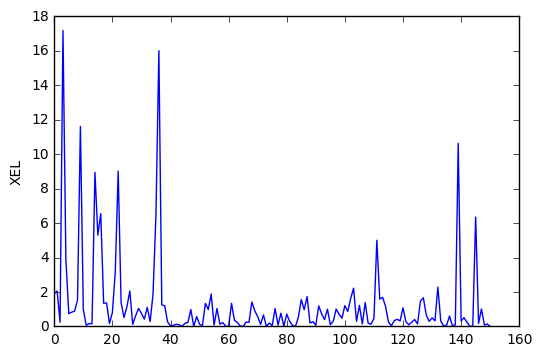

5.134051927152317 28.7754


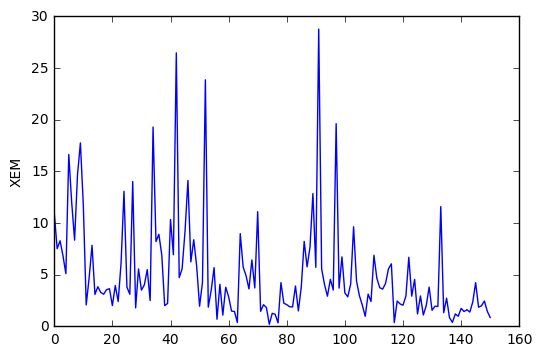

8.652189331125827 56.27


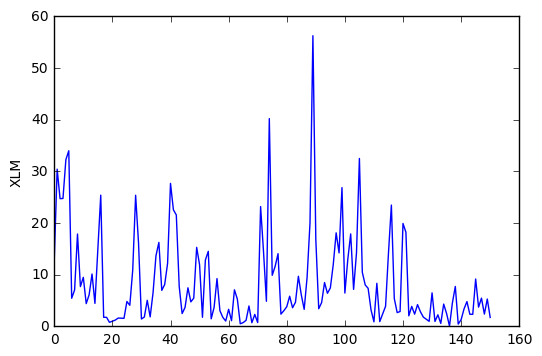

0.016057505496688745 0.9955


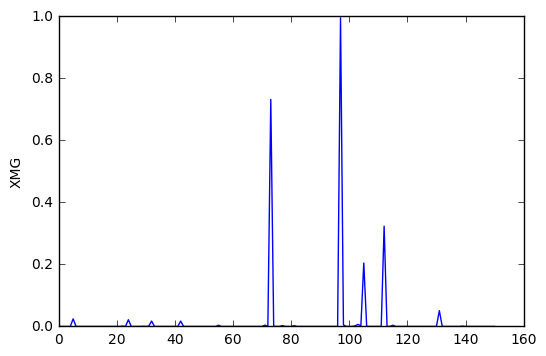

6.774107655629137 51.56


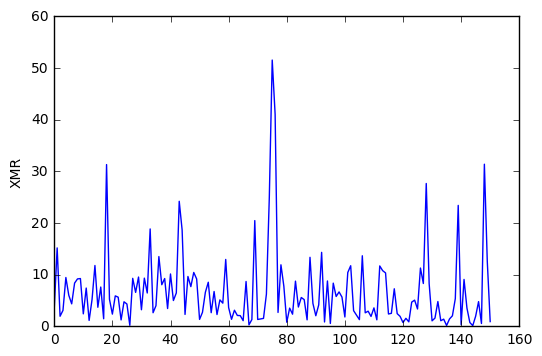

0.052044526688741724 2.9935


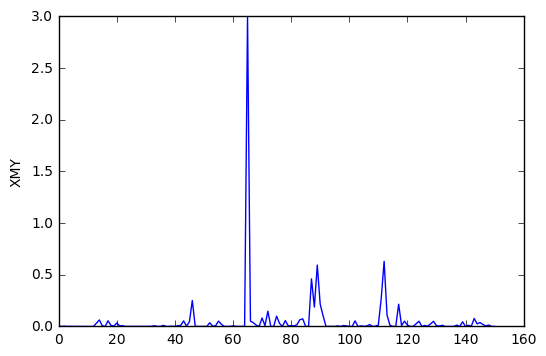

16.111300993377494 104.75


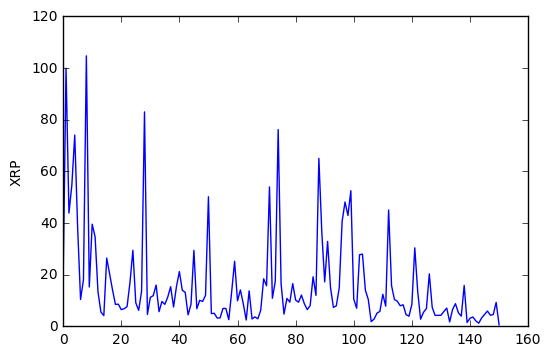

0.010213117880794702 0.3488


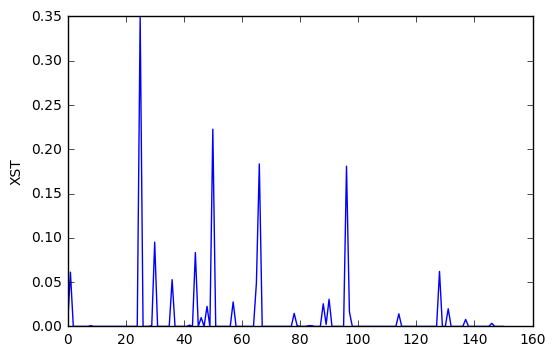

0.022954310596026487 1.2835


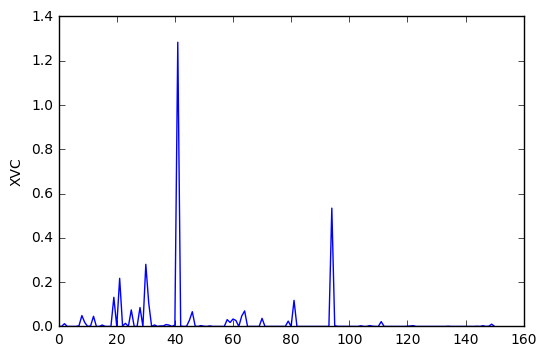

0.9660925488741727 12.2014


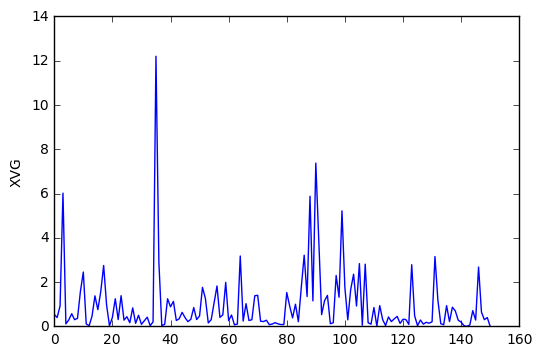

0.014416259602649006 0.32141


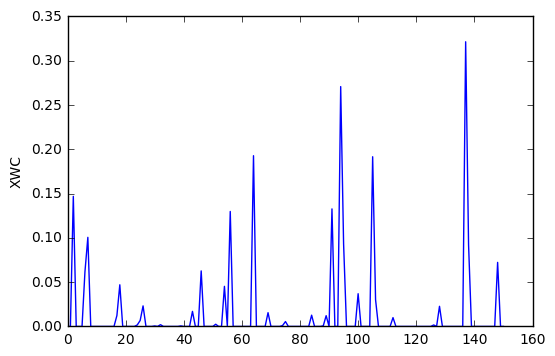

0.22504367834437086 3.2305342


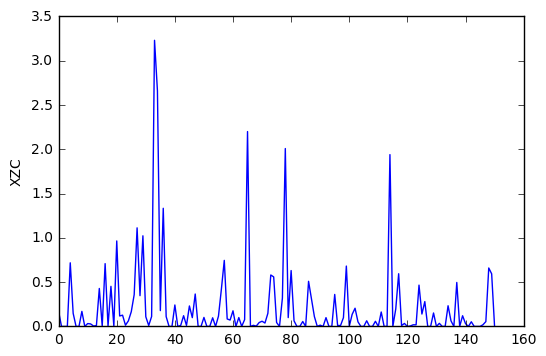

0.026463126754966884 1.1605453


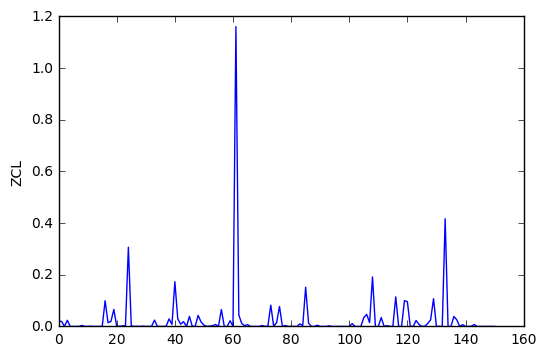

4.760219225165565 27.3


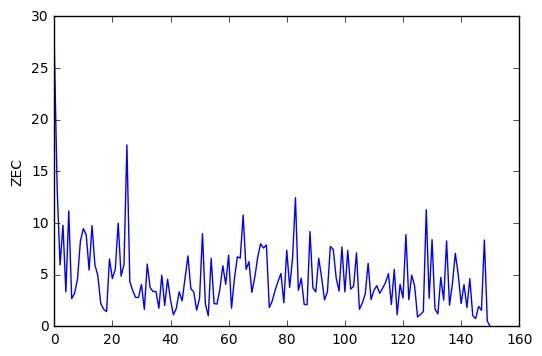

0.09959142781456955 1.45903


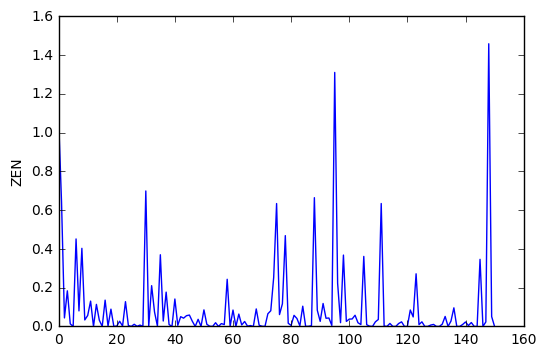

In [8]:
for u in urls:
    #if urls.index(u) >= 20:
    #    break
    r = requests.get(u)
    df = pd.DataFrame(r.json()['Data'])
    print (df['volumeto'].mean(), df['volumeto'].max())
    #print (stats.zscore(df['volumeto']))
    plt.ylabel(names[urls.index(u)])
    plt.plot(df['volumeto'])
    plt.show()

In [75]:
df = pd.DataFrame(r.json()['Data'])

In [77]:
for i in reversed(range(4)):
    print (df['high'][i])
    #if df['high'][i] / df['high'][i-3] >= 1.045:
    #    print (df['time'][i])
print (df['high'][3], df['high'][0])

3.891e-05
3.891e-05
3.819e-05
3.82e-05
3.891e-05 3.82e-05


In [27]:
u = 'https://min-api.cryptocompare.com/data/histohour?fsym=SHIRF&tsym=BTC&limit=200&aggregate=3&e=CCCAGG'
r = requests.get(u)
dff = pd.DataFrame(r.json()['Data'])
df = dff
#print (df[:-20])
print (df['volumeto'].mean(), df['volumeto'].max())
print (df['volumefrom'].mean(), df['volumefrom'].max())

#print (stats.zscore(df['volumeto']))
#plt.ylabel(names[urls.index(u)])
plt.plot(df['volumeto'])
plt.show()
plt.plot(df['volumefrom'])
plt.show()

KeyError: 'volumeto'

In [32]:
df.loc[0]

close         3.113000e-05
high          3.130000e-05
low           3.113000e-05
open          3.130000e-05
time          1.502273e+09
volumefrom    8.760000e+01
volumeto      2.727000e-03
Name: 0, dtype: float64

In [34]:
import hashlib

In [55]:
a = 'aaa'
a = a.encode('utf-8')
b = 'aaa'
b = b.encode('utf-8')

In [56]:
q = hashlib.sha1(a)
qq = hashlib.sha1(b)

In [59]:
q.hexdigest()
qq.hexdigest()

'7e240de74fb1ed08fa08d38063f6a6a91462a815'

In [62]:
s = str(r.json()['Data']).encode('utf-8')

In [63]:
hashlib.md5(s).hexdigest()

'c1fbc8a4b156f026f01411b11d427889'

In [8]:
%pwd

'/home/me/soft/other/python-bittrex-master/bittrex'

In [3]:
%cd fast_dump/

/home/me/soft/other/python-bittrex-master/bittrex/fast_dump


In [4]:
import os

In [11]:
dump = os.listdir()

In [12]:
dump.sort()

In [14]:
len(dump)
dump[-8:]

['1509717138.7557645',
 '1509717199.2299795',
 '1509717259.6943476',
 '__pycache__',
 'bittrex.py',
 'fast_analyz.py',
 'fast_saver.py',
 'file.txt']

In [13]:
del dump[-5:]

In [9]:
import time

In [12]:
for i in dump[-60:]:
    print (time.ctime(float(i)))

Tue Oct 31 12:07:54 2017
Tue Oct 31 12:08:54 2017
Tue Oct 31 12:09:54 2017
Tue Oct 31 12:10:55 2017
Tue Oct 31 12:11:55 2017
Tue Oct 31 12:12:55 2017
Tue Oct 31 12:13:56 2017
Tue Oct 31 12:14:56 2017
Tue Oct 31 12:15:57 2017
Tue Oct 31 12:16:57 2017
Tue Oct 31 12:17:57 2017
Tue Oct 31 12:18:57 2017
Tue Oct 31 12:19:58 2017
Tue Oct 31 12:20:58 2017
Tue Oct 31 12:21:58 2017
Tue Oct 31 12:22:59 2017
Tue Oct 31 12:23:59 2017
Tue Oct 31 12:24:59 2017
Tue Oct 31 12:26:00 2017
Tue Oct 31 12:27:00 2017
Tue Oct 31 12:28:00 2017
Tue Oct 31 12:29:00 2017
Tue Oct 31 12:30:01 2017
Tue Oct 31 12:31:01 2017
Tue Oct 31 12:32:01 2017
Tue Oct 31 12:33:02 2017
Tue Oct 31 12:34:02 2017
Tue Oct 31 12:35:02 2017
Tue Oct 31 12:36:03 2017
Tue Oct 31 12:37:03 2017
Tue Oct 31 12:38:03 2017
Tue Oct 31 12:39:04 2017
Tue Oct 31 12:40:04 2017
Tue Oct 31 12:41:05 2017
Tue Oct 31 12:42:05 2017
Tue Oct 31 12:43:05 2017
Tue Oct 31 12:44:05 2017
Tue Oct 31 12:45:06 2017
Tue Oct 31 12:46:06 2017
Tue Oct 31 12:47:06 2017


In [60]:
# скользящее окно для поиска изменений объёма
a = pd.read_csv(dump[-1])
b = pd.read_csv(dump[-8])
for i in range(261):
    if a['BaseVolume'][i] / b['BaseVolume'][i] >= 1.05:
        print (a['MarketName'][i], a['BaseVolume'][i], b['BaseVolume'][i])

BTC-INFX 23.36272649 18.41010851
BTC-LGD 322.03001838 304.03189836
BTC-MLN 87.09561847 78.80295467
BTC-TKS 126.1874433 117.98946764
BTC-UNO 6.62748928 5.52798727
BTC-XVC 1.9617599 1.82316929
BTC-ZCL 41.54514264 39.22799731
ETH-NMR 701.9319051 664.42083766


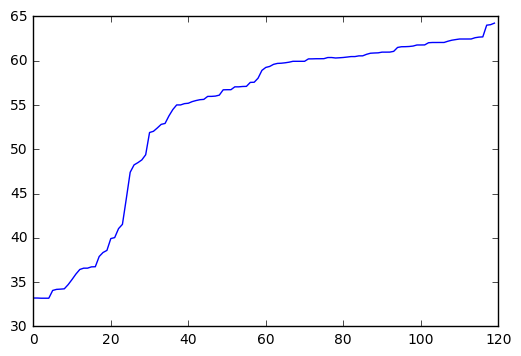

In [16]:
# отрисовка изменений объема
v = []
d = dump[-120:]
for i in d:
    a = pd.read_csv(i)
    v.append(a['BaseVolume'][131])
    
plt.plot(v)
plt.show()

In [179]:
mostly_interesting = ['SPHR', 'DRACO', 'EXP', 'PKB', 'TRUST', 'VTC']
int_urls = []
for i in mostly_interesting:
    u = 'https://min-api.cryptocompare.com/data/histominute?fsym='+i+'&tsym=BTC&limit=500&e=BitTrex'
    int_urls.append(u)

In [183]:
import time

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=18, tm_min=53, tm_sec=53, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.032595648502994026 3.7
price 0.0004540999999999999 0.0005456000000000001 1.2014974675181684


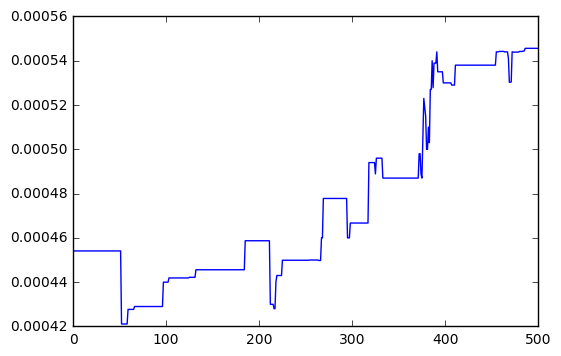

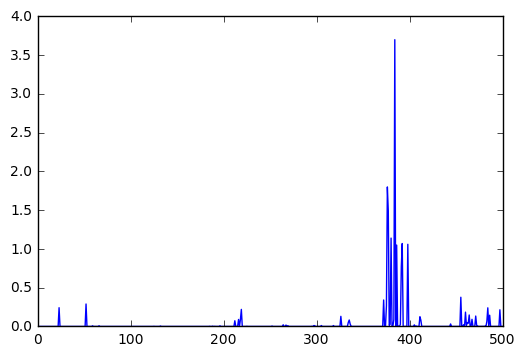

DRACO
vol 0.02346895299401198 0.8235
price 4.249e-06 4.5550000000000004e-06 1.0698731004229982


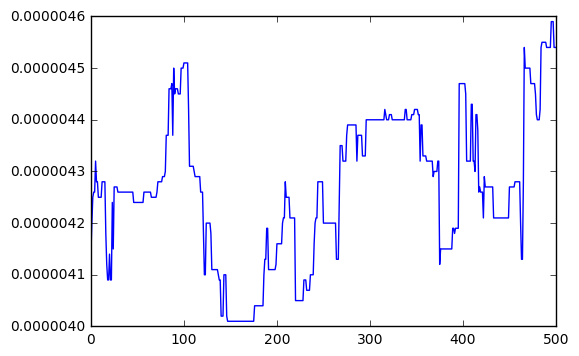

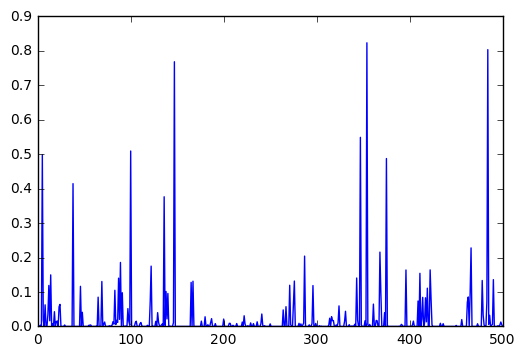

EXP
vol 0.22126485528942108 7.87
price 0.0004466 0.0004844800000000001 1.0789049438738951


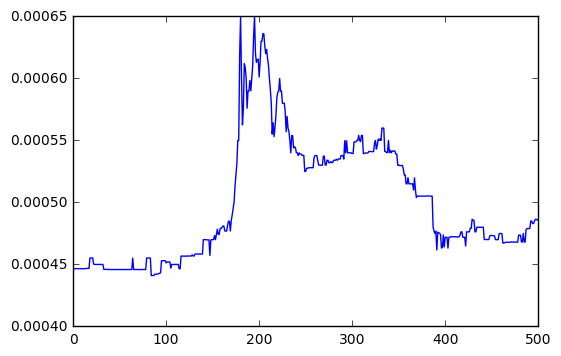

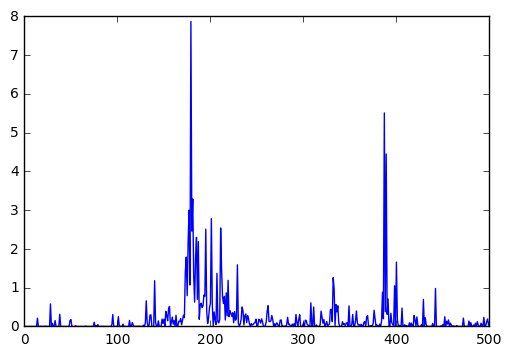

PKB
vol 0.043804500099800414 0.9689
price 7.270999999999999e-05 7.306000000000001e-05 1.0160682367541234


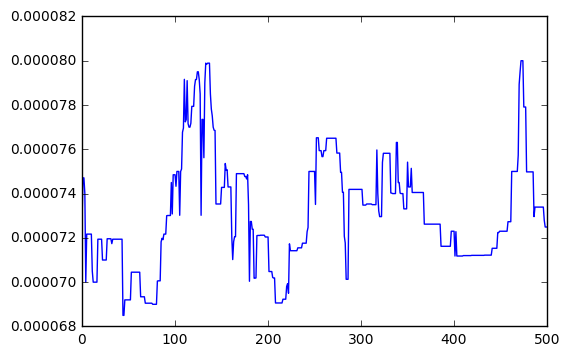

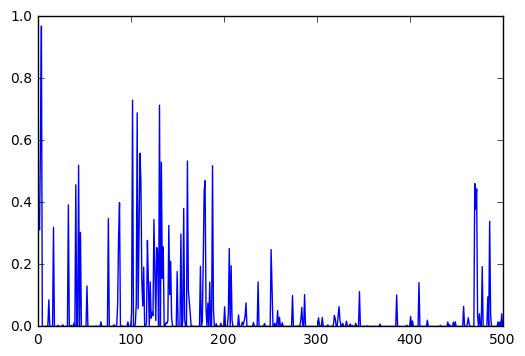

TRUST
vol 0.00793017337325349 1.2
price 9.83e-06 1.0980000000000002e-05 1.1150592216582065


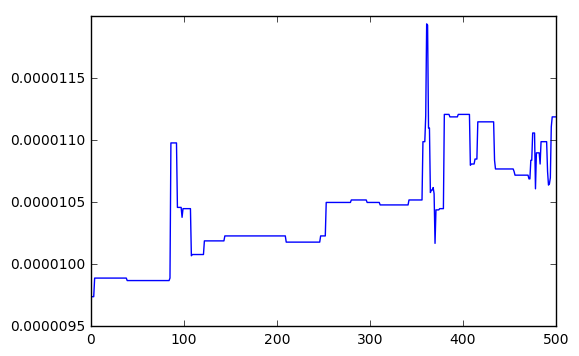

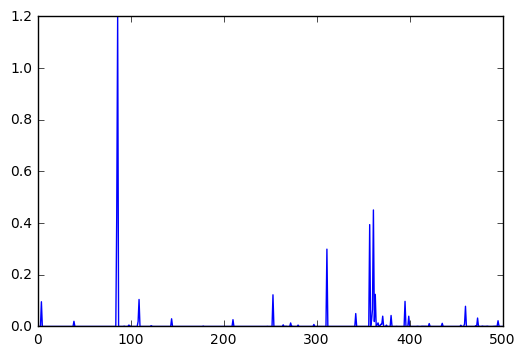

VTC
vol 0.13106814241516956 6.71
price 0.00011522 0.00013435 1.1704144748251346


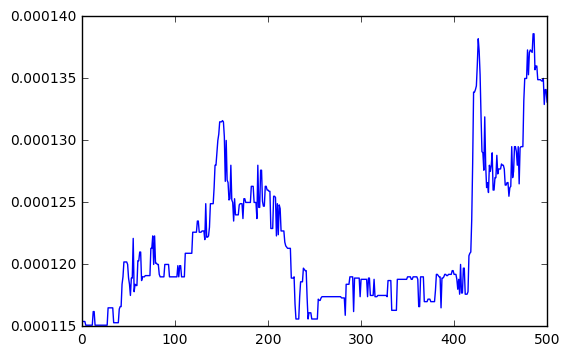

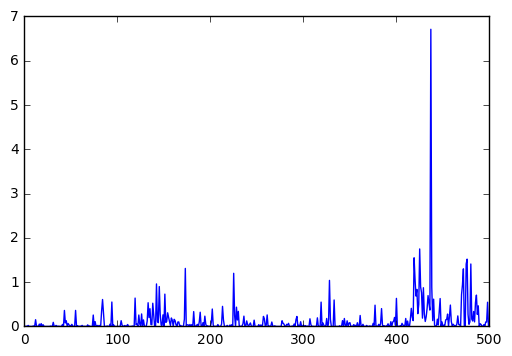

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=19, tm_min=4, tm_sec=2, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.033828301197604806 3.7
price 0.0004540999999999999 0.00053485 1.1857006533069079


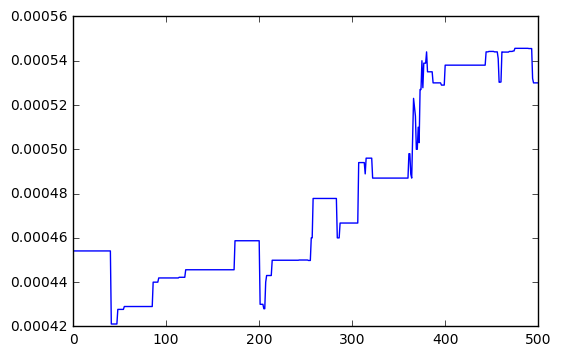

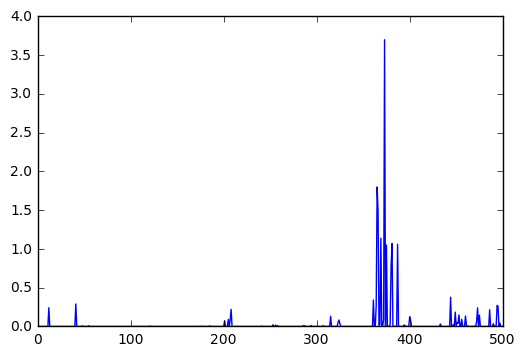

DRACO
vol 0.02246515465069861 0.8235
price 4.199e-06 4.544e-06 1.0853095654941907


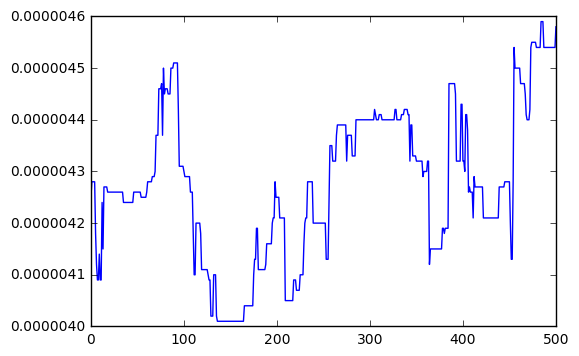

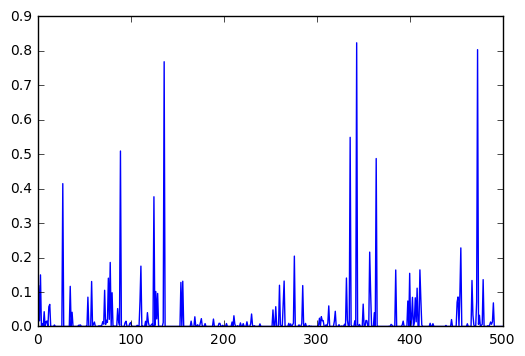

EXP
vol 0.22174369760479035 7.87
price 0.00044926000000000005 0.0004894599999999999 1.086039033209348


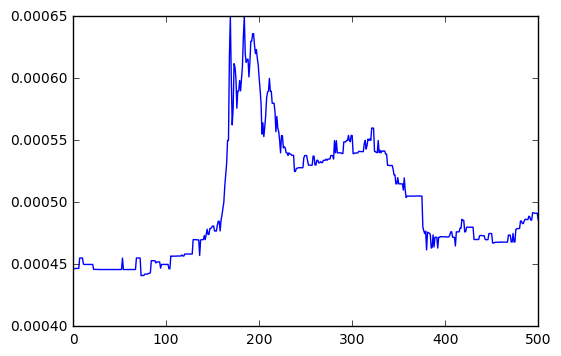

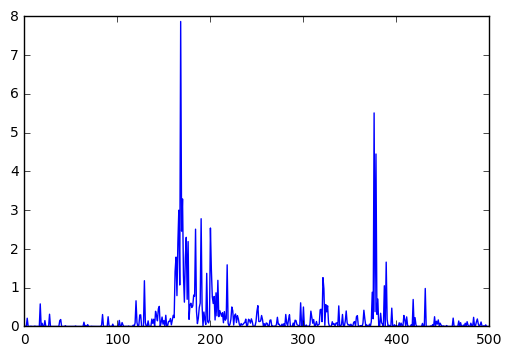

PKB
vol 0.03892858992015968 0.73
price 7.082600000000002e-05 7.4408e-05 1.0410261229092272


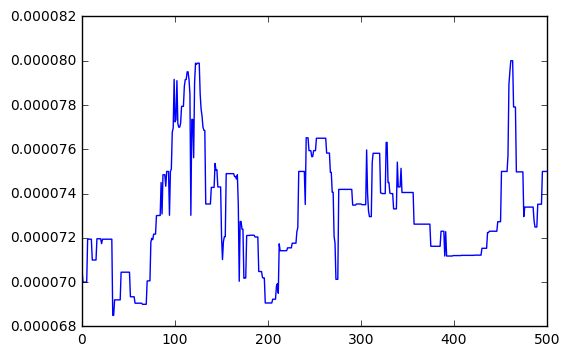

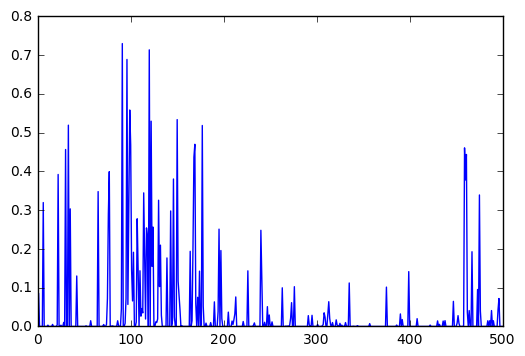

TRUST
vol 0.007794624471057882 1.2
price 9.89e-06 1.0685999999999999e-05 1.0974721941354904


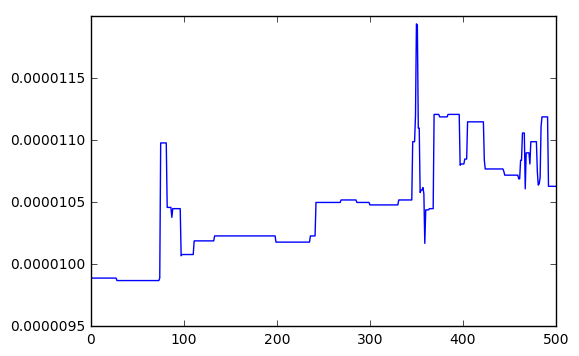

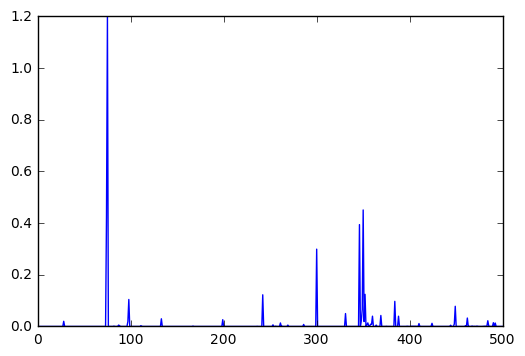

VTC
vol 0.13367114960079834 6.71
price 0.00011532 0.00013188 1.151443281078267


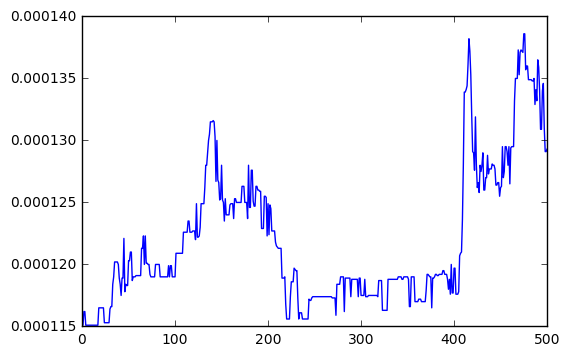

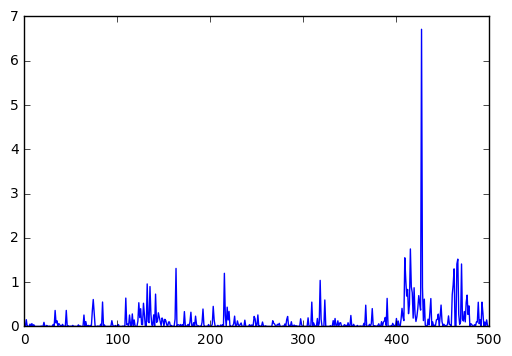

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=19, tm_min=14, tm_sec=8, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.03388616946107786 3.7
price 0.0004540999999999999 0.0005356 1.177420538794686


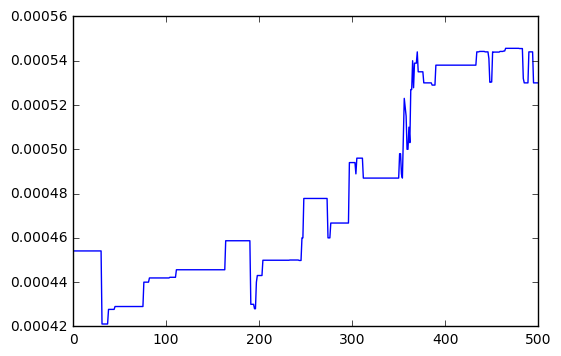

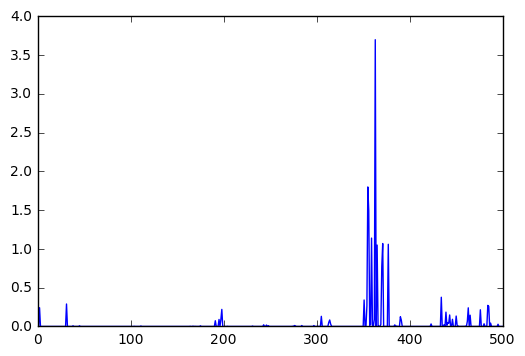

DRACO
vol 0.023199204550898214 0.8235
price 4.217e-06 4.528e-06 1.0731054041279342


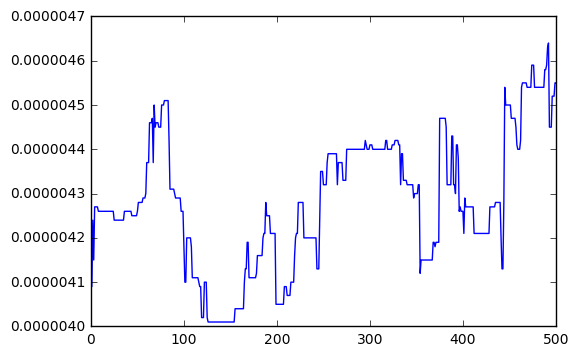

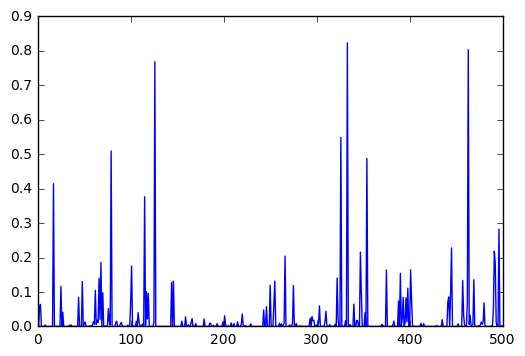

EXP
vol 0.22138860518962064 7.87
price 0.0004505499999999999 0.00048829 1.0867946911841033


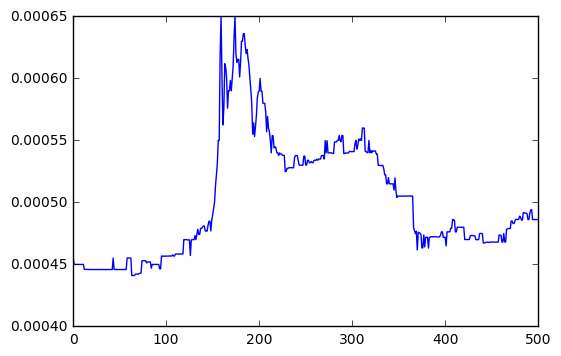

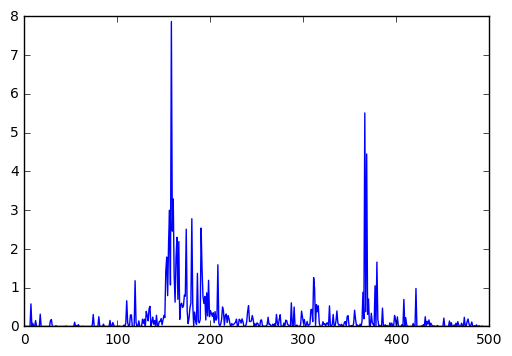

PKB
vol 0.038964577944111775 0.73
price 7.147800000000001e-05 7.3278e-05 1.0297402960067015


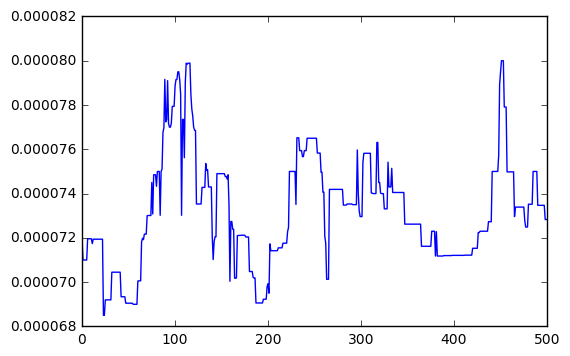

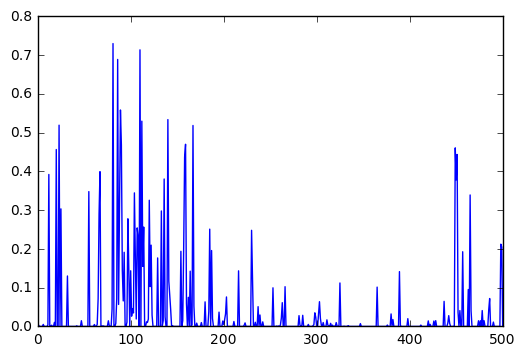

TRUST
vol 0.008601365189620755 1.2
price 9.89e-06 1.0958e-05 1.0969329288843945


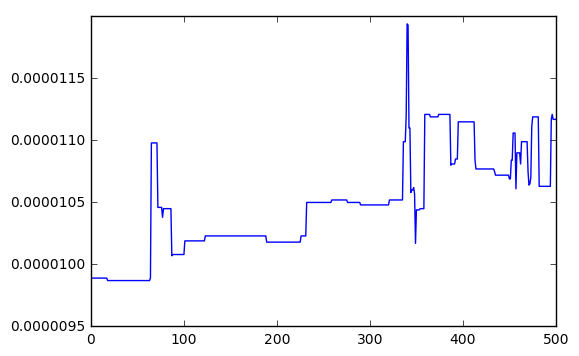

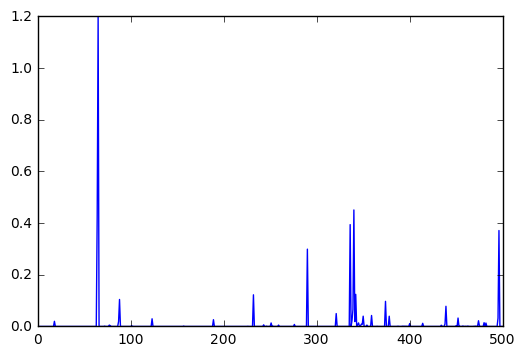

VTC
vol 0.13835411167664668 6.71
price 0.00011538000000000002 0.00012691999999999998 1.1079476687222636


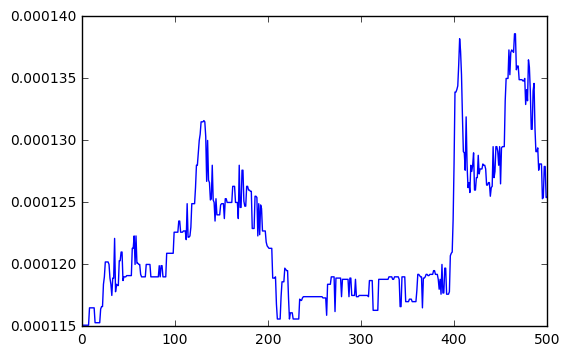

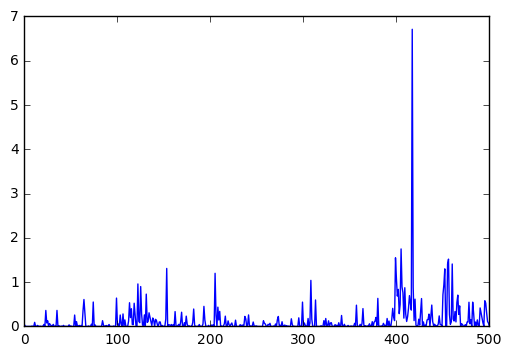

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=19, tm_min=24, tm_sec=15, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.03364507365269462 3.7
price 0.0004540999999999999 0.0005292999999999999 1.1661161271379288


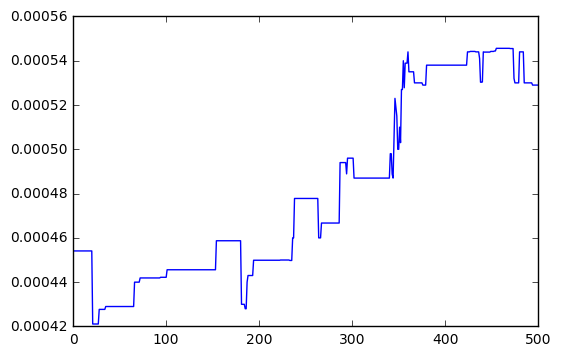

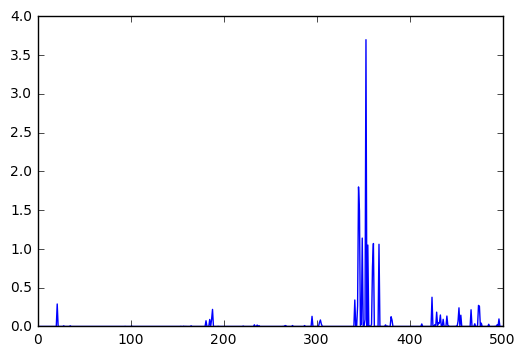

DRACO
vol 0.03031997960079842 2.06
price 4.260000000000001e-06 4.853e-06 1.1150234741784033


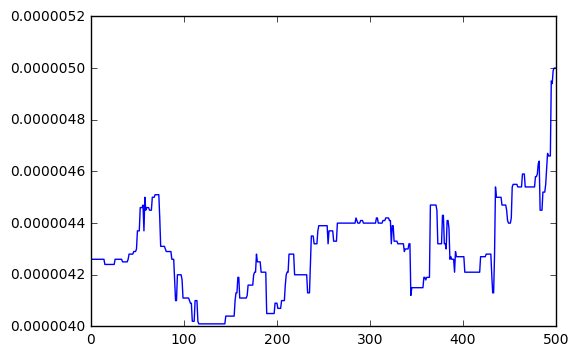

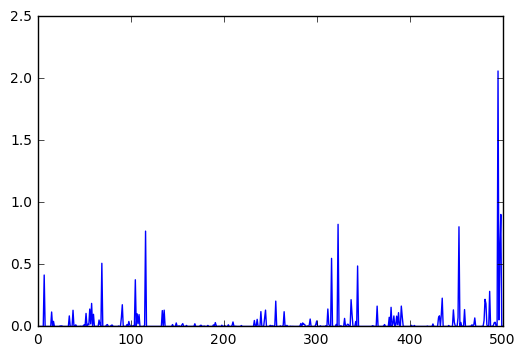

EXP
vol 0.22009515389221548 7.87
price 0.00044677 0.00048812000000000004 1.0926805232037269


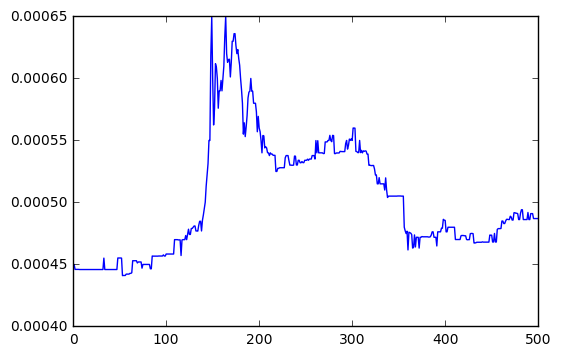

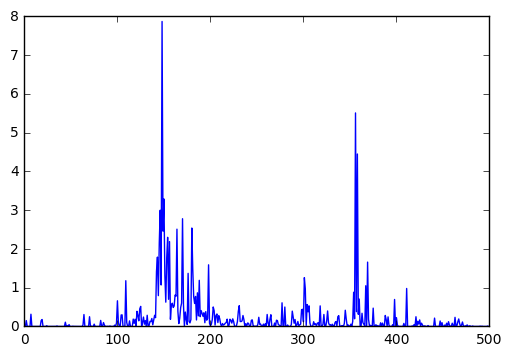

PKB
vol 0.039582214670658686 0.73
price 7.192200000000001e-05 7.249999999999999e-05 1.0166131860751462


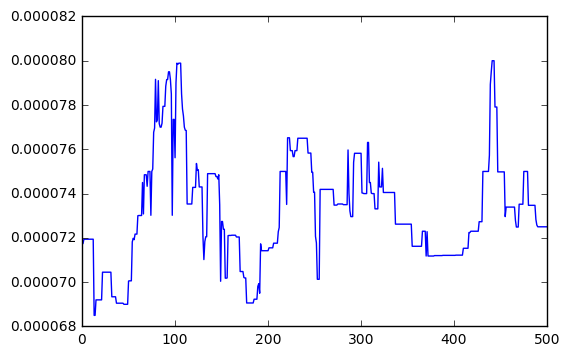

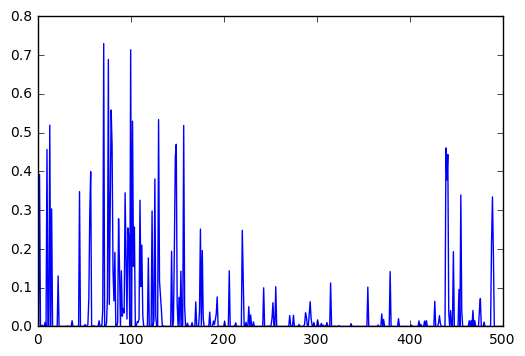

TRUST
vol 0.008775221876247503 1.2
price 9.886e-06 1.1343e-05 1.1433101680048576


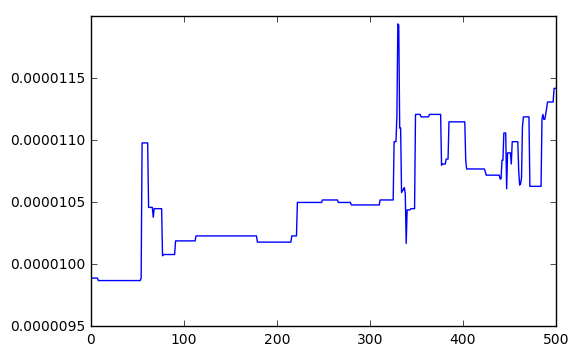

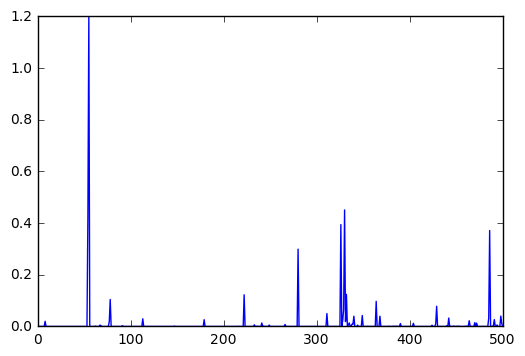

VTC
vol 0.13894462065868257 6.71
price 0.00011578 0.00012638 1.0894085281980743


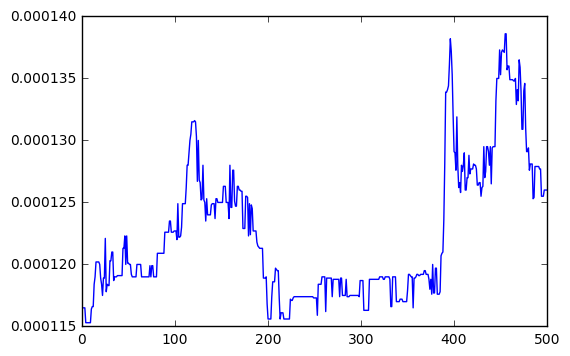

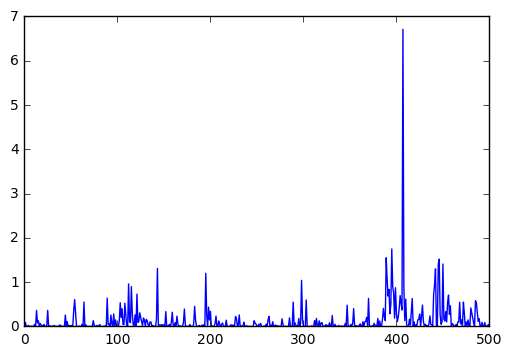

time.struct_time(tm_year=2017, tm_mon=8, tm_mday=19, tm_hour=19, tm_min=34, tm_sec=22, tm_wday=5, tm_yday=231, tm_isdst=0)
SPHR
vol 0.03369449481037925 3.7
price 0.0004540999999999999 0.000529 1.1879631708960254


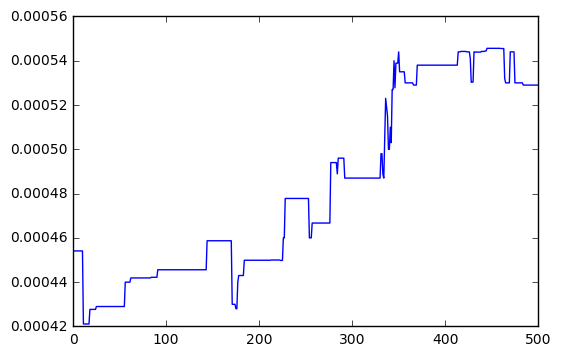

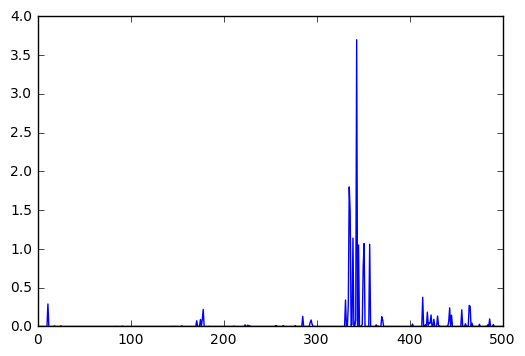

DRACO
vol 0.030052877405189637 2.06
price 4.25e-06 4.746000000000001e-06 1.1364207221350078


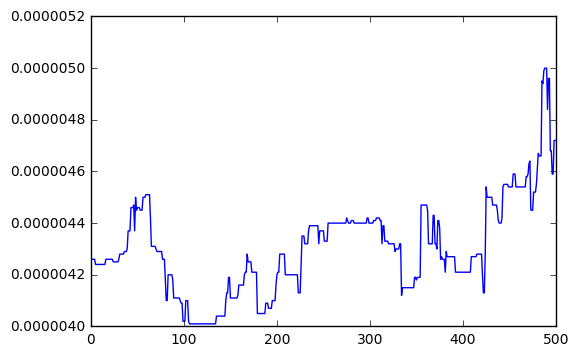

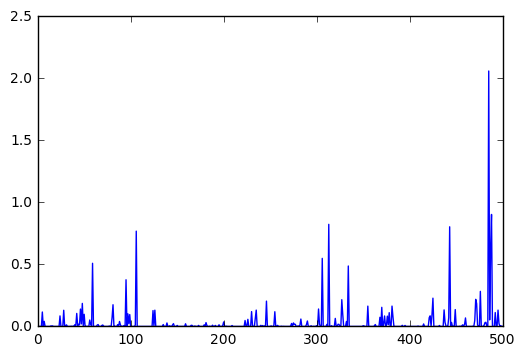

EXP
vol 0.21923760499001985 7.87
price 0.00044590000000000005 0.0004898600000000001 1.0964491291021905


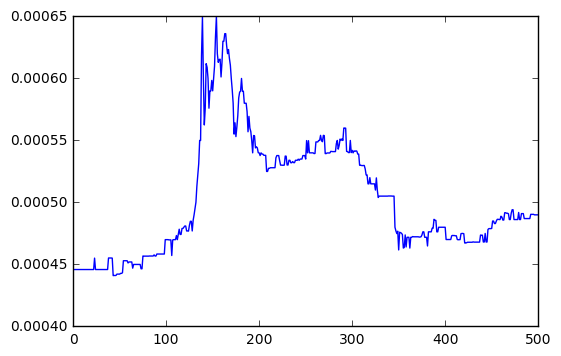

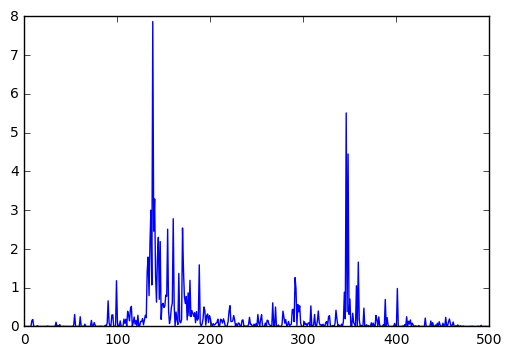

PKB
vol 0.03897542025948102 0.73
price 6.988199999999999e-05 7.249999999999999e-05 1.0371267535786832


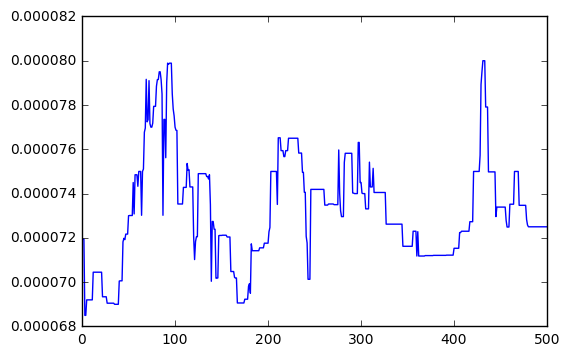

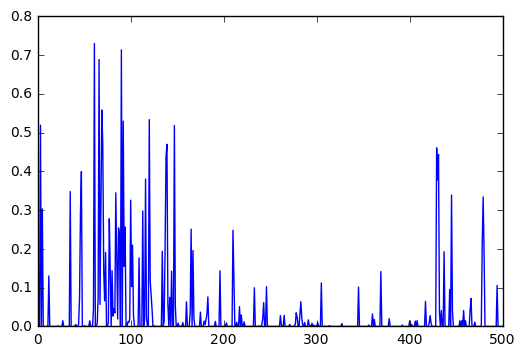

TRUST
vol 0.009553375568862274 1.2
price 9.87e-06 1.1459999999999999e-05 1.1582573454913878


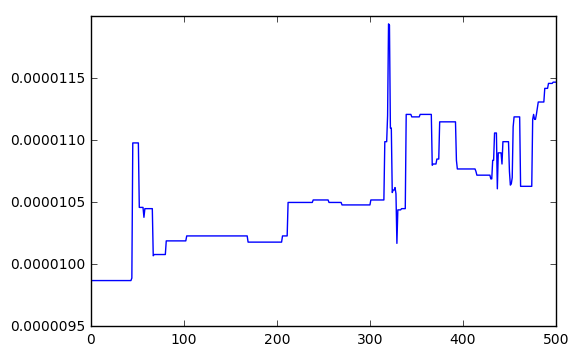

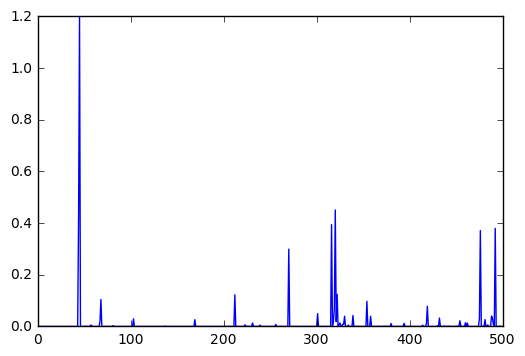

VTC
vol 0.1408527324351297 6.71
price 0.00011878 0.00012715 1.067737587059088


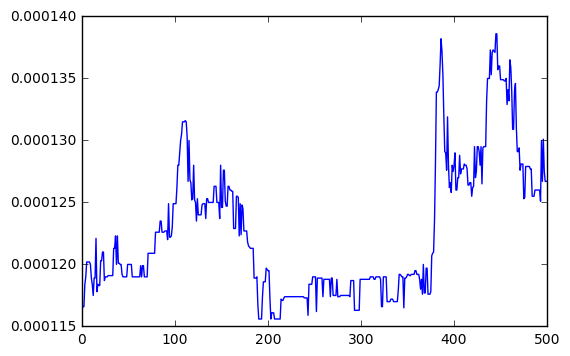

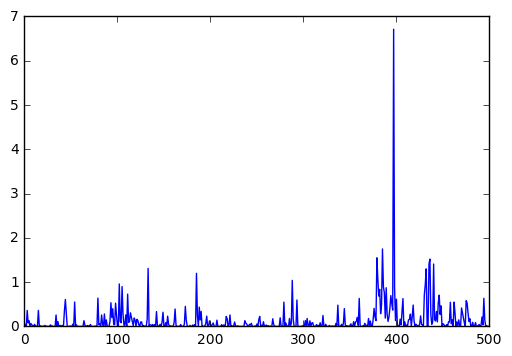

KeyboardInterrupt: 

In [188]:
# этот код раз в 10 минут отрисовывал данные(цена закрытия и объем) по наиболее интересным монетам.
while 1:
    
    print (time.localtime())
    for u in int_urls:

        r = requests.get(u)

        df = pd.DataFrame(r.json()['Data'])

        diff = df['close'][-15:].mean() / df['close'][:15].mean()

        print (mostly_interesting[int_urls.index(u)])
        print ('vol', df['volumeto'].mean(), df['volumeto'].max())
        print ('price', df['close'][:10].mean(), df['close'][-10:].mean(), diff)


        plt.plot(df['close'])
        plt.show()
        plt.plot(df['volumeto'])
        plt.show()
    
    time.sleep(600)

In [189]:
int_urls_h = []
for i in mostly_interesting:
    u = 'https://min-api.cryptocompare.com/data/histohour?fsym='+i+'&tsym=BTC&limit=120&e=BitTrex'
    int_urls_h.append(u)

SPHR
vol 1.4338171876033055 19.45
price 0.00046702 0.00048632 1.0561072199072021


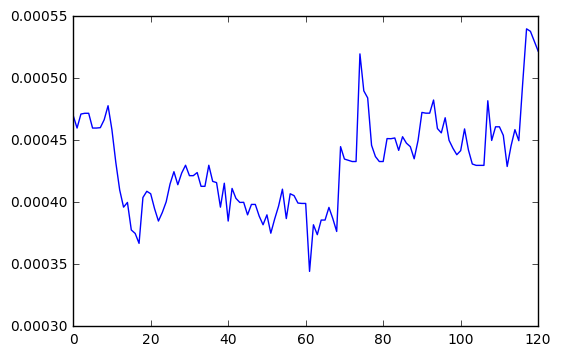

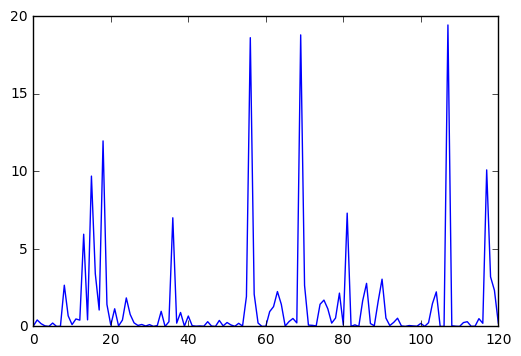

DRACO
vol 1.8081284297520661 44.43
price 2.8730000000000003e-06 4.323000000000001e-06 1.4928065768440286


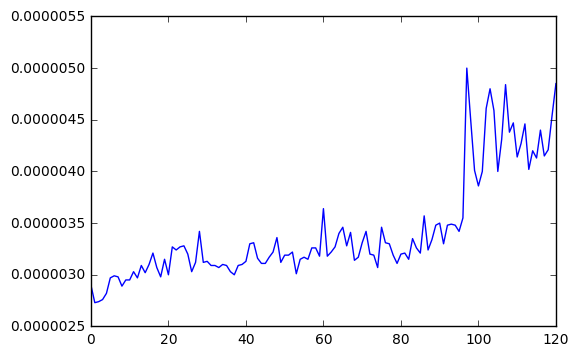

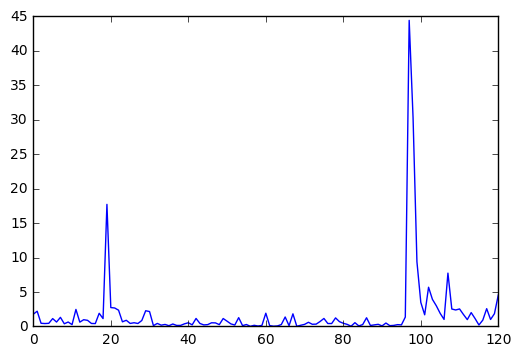

EXP
vol 2.2699317355371895 51.14
price 0.00049546 0.00050173 0.9806104999528725


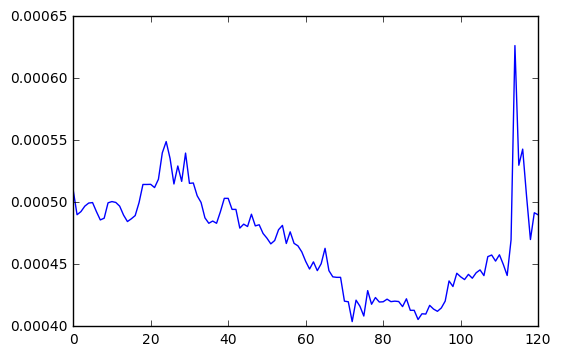

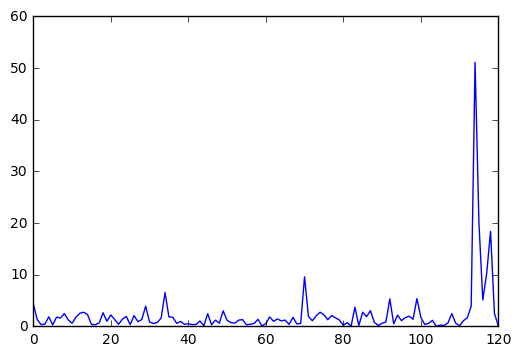

PKB
vol 0.840693447933884 20.96
price 6.0191999999999996e-05 7.2858e-05 1.2018089628907982


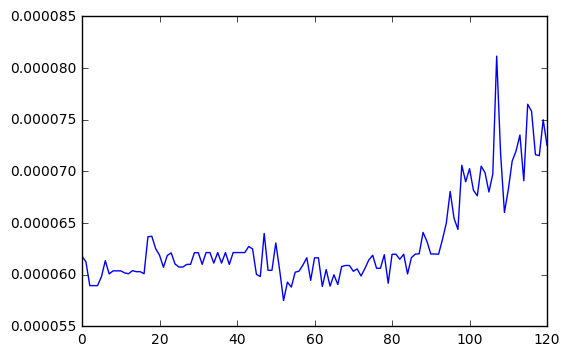

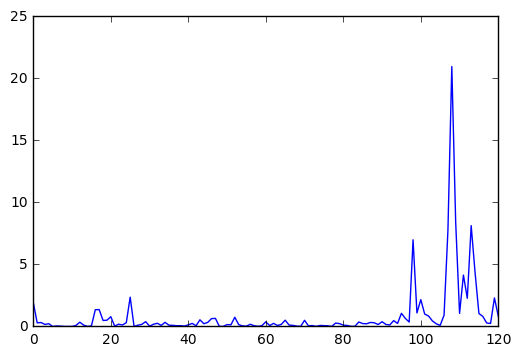

TRUST
vol 0.31254090909090904 6.83
price 1.0064e-05 1.0637e-05 1.036182450508293


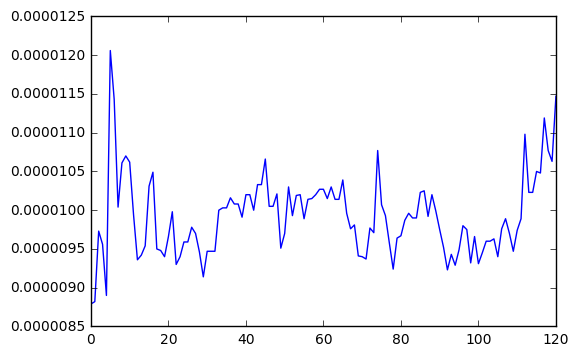

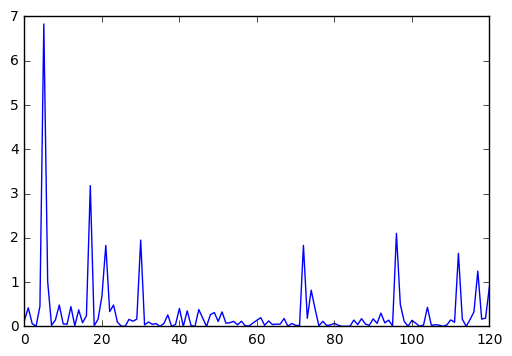

VTC
vol 4.120310743801654 52.77
price 9.2887e-05 0.00012278999999999998 1.3157435927238914


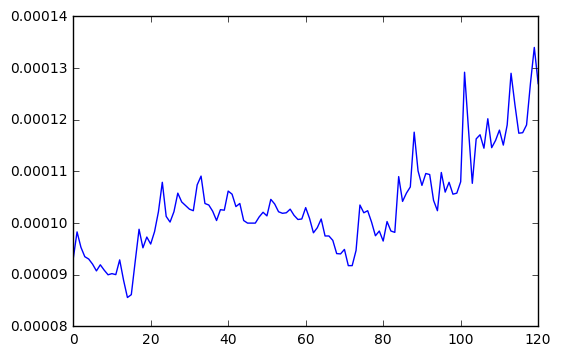

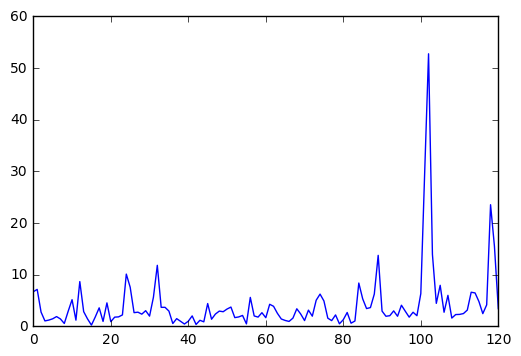

In [190]:
for u in int_urls_h:

        r = requests.get(u)

        df = pd.DataFrame(r.json()['Data'])

        diff = df['close'][-15:].mean() / df['close'][:15].mean()

        print (mostly_interesting[int_urls_h.index(u)])
        print ('vol', df['volumeto'].mean(), df['volumeto'].max())
        print ('price', df['close'][:10].mean(), df['close'][-10:].mean(), diff)


        plt.plot(df['close'])
        plt.show()
        plt.plot(df['volumeto'])
        plt.show()